In [ ]:
from google.colab import files

# upload a file
upload = files.upload()

Saving Dataset_Diabetes_Diabetic_Data.csv to Dataset_Diabetes_Diabetic_Data.csv


In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn import tree

from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix

In [ ]:
diabetes_df = pd.read_csv("Dataset_Diabetes_Diabetic_Data.csv")
diabetes_df

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,change,diabatic
0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,No,No
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,Ch,Yes
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,No,Yes
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,Ch,Yes
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70175,100677726,AfricanAmerican,Female,[80-90),1,3,7,7,60,0,17,0,1,1,491,707,250,9,No,No
70176,38726739,AfricanAmerican,Female,[70-80),1,1,7,3,57,4,11,0,0,1,786,414,424,9,No,No
70177,58160520,AfricanAmerican,Male,[90-100),1,3,7,4,21,1,8,0,0,1,820,427,276,9,No,No
70178,43686936,Caucasian,Female,[80-90),1,1,7,1,49,0,12,0,0,0,427,428,428,9,No,No


In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70180 entries, 0 to 70179
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   patient_nbr               70180 non-null  int64 
 1   race                      70180 non-null  object
 2   gender                    70180 non-null  object
 3   age                       70180 non-null  object
 4   admission_type_id         70180 non-null  int64 
 5   discharge_disposition_id  70180 non-null  int64 
 6   admission_source_id       70180 non-null  int64 
 7   time_in_hospital          70180 non-null  int64 
 8   num_lab_procedures        70180 non-null  int64 
 9   num_procedures            70180 non-null  int64 
 10  num_medications           70180 non-null  int64 
 11  number_outpatient         70180 non-null  int64 
 12  number_emergency          70180 non-null  int64 
 13  number_inpatient          70180 non-null  int64 
 14  diag_1                

In [ ]:
diabetes_df.isna().sum()

,0
patient_nbr,0
race,0
gender,0
age,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0
num_lab_procedures,0
num_procedures,0


In [ ]:
# Are there any duplicates ?

duplicate_rows = diabetes_df[diabetes_df.duplicated()]
num_duplicates = diabetes_df.duplicated().sum()
print("Total number of duplicate rows: ", num_duplicates)
duplicate_rows

Total number of duplicate rows:  0


,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,change,diabatic


In [ ]:
print(f"The unique values of diabatic feature in diabetes_df - {diabetes_df['diabatic'].unique()}\n")

print(f"Count of the unique values of diabatic feature in diabetes_df - \n{diabetes_df['diabatic'].value_counts()}\n")

print(f"The distribution of diabatic feature in diabetes_df - \n{diabetes_df['diabatic'].value_counts(normalize = True)}")

The unique values of diabatic feature in diabetes_df - ['No' 'Yes']

Count of the unique values of diabatic feature in diabetes_df - 
diabatic
Yes    46777
No     23403
Name: count, dtype: int64

The distribution of diabatic feature in diabetes_df - 
diabatic
Yes    0.666529
No     0.333471
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Count plot indicating number of patients suffering from diabetes')

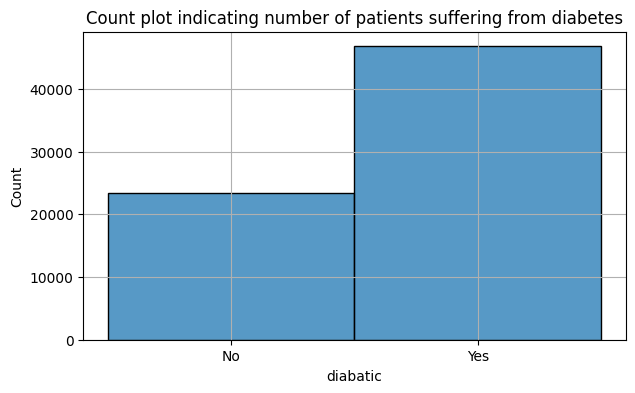

In [ ]:
plt.figure(figsize = (7, 4))
sns.histplot(x = 'diabatic', data = diabetes_df, binwidth = 0.5)
plt.grid(True)
plt.title('Count plot indicating number of patients suffering from diabetes')

* The "diabatic" column in the diabetes_df DataFrame indicates whether a patient is diabetic.
* Approximately 67% of the patients in the dataset are diabetic, while 33% are not.

In [ ]:
# Dropping the unwanted variable patient_nbr

diabetes_df.drop(["patient_nbr"], axis = 1, inplace = True)

In [ ]:
print(f"The number of unique race are {diabetes_df['race'].nunique()}\n")

print(f"The unique values in race : \n{diabetes_df['race'].unique()}\n")

print(f"The Number of patients of each race : \n{diabetes_df['race'].value_counts()}\n")

print(f"The distributon of number of patients of each race : \n{diabetes_df['race'].value_counts(normalize = True)}\n")

The number of unique race are 6

The unique values in race : 
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']

The Number of patients of each race : 
race
Caucasian          51123
AfricanAmerican    15008
?                   1461
Hispanic            1341
Other                874
Asian                373
Name: count, dtype: int64

The distributon of number of patients of each race : 
race
Caucasian          0.728455
AfricanAmerican    0.213850
?                  0.020818
Hispanic           0.019108
Other              0.012454
Asian              0.005315
Name: proportion, dtype: float64



Text(0.5, 1.0, 'Distribution of the race of a patient')

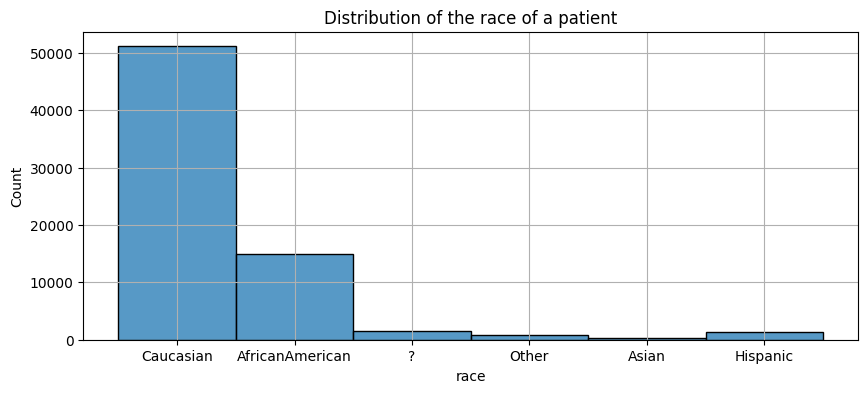

In [ ]:
plt.figure(figsize = (10, 4))
sns.histplot(x = 'race', data = diabetes_df, binwidth = 1)
plt.grid(True)
plt.title('Distribution of the race of a patient')

In [ ]:
# Features - race has some unknown value '?'. Replacing '?' with nan

diabetes_df['race'] = diabetes_df['race'].replace(to_replace = '?',  value = np.nan)


#Deleting the rows containing nan

diabetes_df.dropna(inplace = True)

Text(0.5, 1.0, 'Distribution of the race of the patient')

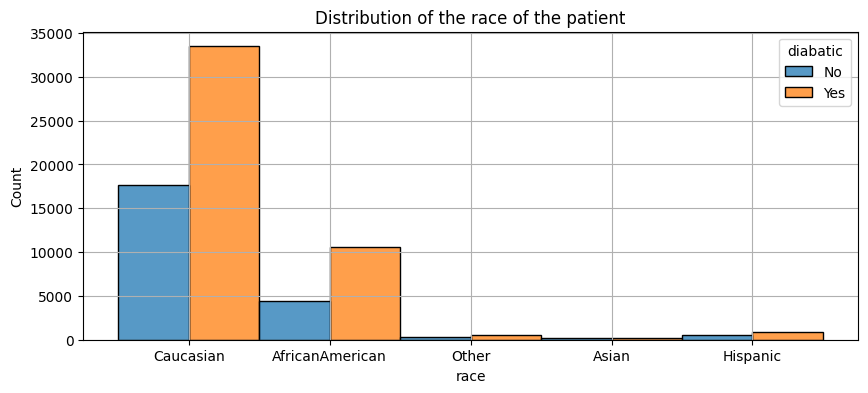

In [ ]:
plt.figure(figsize = (10, 4))
sns.histplot(x = 'race', data = diabetes_df, hue = 'diabatic', multiple = 'dodge', binwidth = 1)
plt.grid(True)
plt.title('Distribution of the race of the patient')

* The 'race' feature describes the racial background of the patients. Initially, it included 'Caucasian', 'AfricanAmerican', '?', 'Other', 'Asian', and 'Hispanic'.

* 'Caucasian' is the predominant race, accounting for approximately 72.8% of patients, followed by 'AfricanAmerican' at about 21.4%, ? at about 2%, Hispanic at abouy 2%, Other at about 1%)and Asian (0.5%).

* Missing values, represented as '?', were initially present (around 2.1%) were removed.

* Diabetes prevalence across different racial groups .

In [ ]:
print(f"The number of unique values in gender are {diabetes_df['gender'].nunique()}\n")

print(f"The unique values in gender : \n{diabetes_df['gender'].unique()}\n")

print(f"Count of each unique values in gender : \n{diabetes_df['gender'].value_counts()}\n")

print(f"Distribution of the gender : \n{diabetes_df['gender'].value_counts(normalize = True)}\n")

The number of unique values in gender are 3

The unique values in gender : 
['Female' 'Male' 'Unknown/Invalid']

Count of each unique values in gender : 
gender
Female             37305
Male               31413
Unknown/Invalid        1
Name: count, dtype: int64

Distribution of the gender : 
gender
Female             0.542863
Male               0.457122
Unknown/Invalid    0.000015
Name: proportion, dtype: float64



In [ ]:
# Features - gender has some unknown value 'Unknown/Invalid'. Replacing 'Unknown/Invalid' with nan

diabetes_df['gender'] = diabetes_df['gender'].replace(to_replace = 'Unknown/Invalid',  value = np.nan)


#Deleting the rows containing nan

diabetes_df.dropna(inplace = True)

Text(0.5, 1.0, 'Distribution of the gender of the patient')

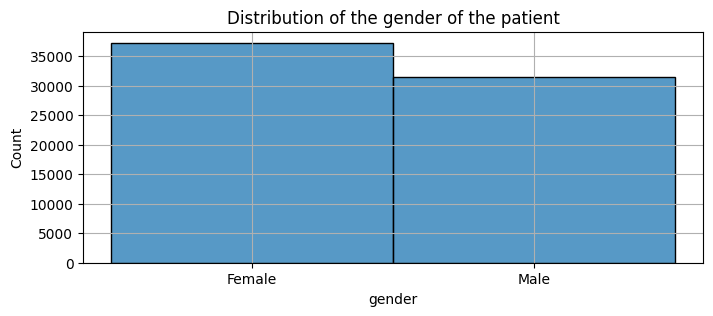

In [ ]:
plt.figure(figsize = (8, 3))
sns.histplot(x = 'gender', data = diabetes_df, binwidth = 1)
plt.grid(True)
plt.title('Distribution of the gender of the patient')

Text(0.5, 1.0, 'Distribution of the gender for both diabetic and non diabetic patients')

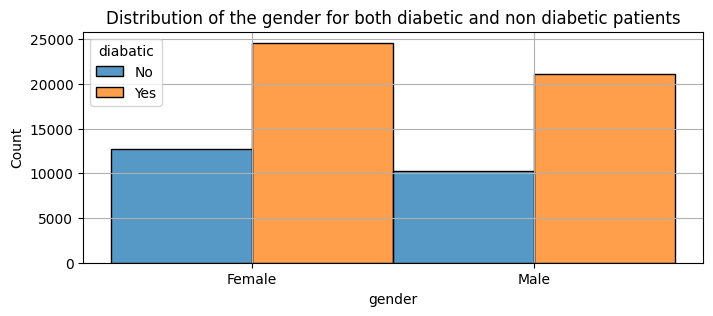

In [ ]:
plt.figure(figsize = (8, 3))
sns.histplot(x = 'gender', data = diabetes_df, hue = 'diabatic', multiple = 'dodge', binwidth = 1)
plt.grid(True)
plt.title('Distribution of the gender for both diabetic and non diabetic patients')

* The 'gender' column in the diabetes_df DataFrame has three unique values: 'Female', 'Male', and 'Unknown/Invalid'.

* The dataset contains predominantly 'Female' (approximately 54.3%) and 'Male' (approximately 45.7%) patients.

* The dataset containing missing value, represented as 'Unknown/Invalid' was removed.

* Diabetes prevalence across different gender groups .

In [ ]:
print(f"The number of unique values in age are {diabetes_df['age'].nunique()}\n")

print(f"The unique values in : \n{diabetes_df['age'].unique()}\n")

print(f"Count of the patients of different : \n{diabetes_df['age'].value_counts()}\n")

print(f"Distribution of age of the patient : \n{diabetes_df['age'].value_counts(normalize = True)}\n ")

The number of unique values in age are 10

The unique values in : 
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']

Count of the patients of different : 
age
[70-80)     17739
[60-70)     14898
[50-60)     11878
[80-90)     11031
[40-50)      6790
[30-40)      2721
[90-100)     1804
[20-30)      1141
[10-20)       560
[0-10)        156
Name: count, dtype: int64

Distribution of age of the patient : 
age
[70-80)     0.258142
[60-70)     0.216799
[50-60)     0.172851
[80-90)     0.160526
[40-50)     0.098810
[30-40)     0.039597
[90-100)    0.026252
[20-30)     0.016604
[10-20)     0.008149
[0-10)      0.002270
Name: proportion, dtype: float64
 


Text(0.5, 1.0, 'Distribution of the age of the patient')

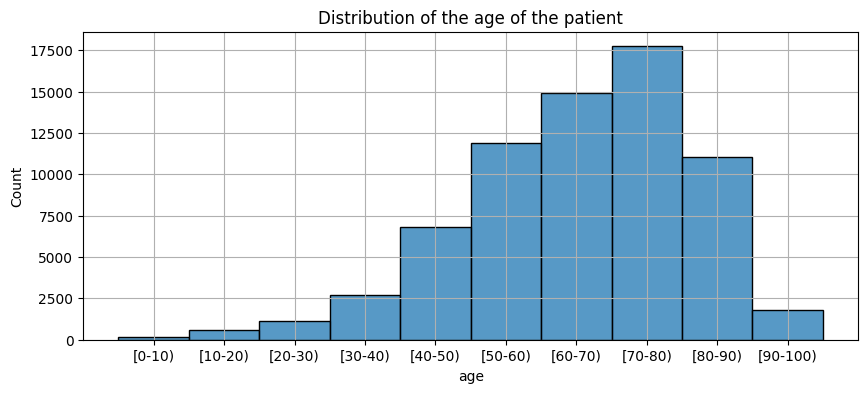

In [ ]:
plt.figure(figsize = (10, 4))
sns.histplot(x = 'age', data = diabetes_df, binwidth = 1)
plt.grid(True)
plt.title('Distribution of the age of the patient')

Text(0.5, 1.0, 'Distribution of the age of both diabetic and non diabetic patient')

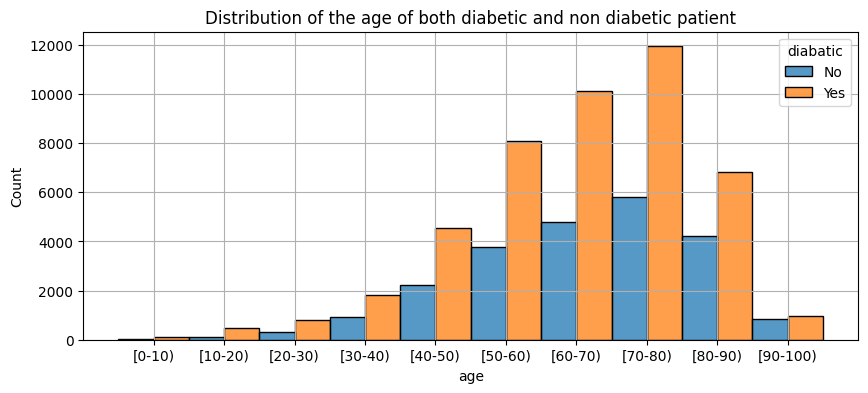

In [ ]:
plt.figure(figsize = (10, 4))
sns.histplot(x = 'age', data = diabetes_df, hue = 'diabatic', multiple = 'dodge', binwidth = 1)
plt.grid(True)
plt.title('Distribution of the age of both diabetic and non diabetic patient')

* This feature represents the age of patients in 10-year intervals (e.g., '[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', [90-100)).

* The highest concentration of patients is in the '[70-80)' age group (around 25.8%), followed by '[60-70)' (around 21.7%), '[50-60)' (around 17.3%), [80-90) (around 16%), '[40-50)' (around 9.9%), '[30-40)' (around 4%), [90-100) (around 3%), '[20-30)' (around 1.7%), '[10-20)' (around 0.8%) and '[0-10)' (around 0.2%)

* Patients of age bracket [0-20) are few in number.

* Majority of patients of age 20 onwards are diabatic.

In [ ]:
print(f"The number of unique values in admission_type_id are: {diabetes_df['admission_type_id'].nunique()}\n")

print(f"The unique values in admission_type_id are: {diabetes_df['admission_type_id'].unique()}\n")

print(f"Count of the unique values in admission_type_id are {diabetes_df['admission_type_id'].value_counts()}")

print(f"Distribution of the unique values in admission_type_id are {diabetes_df['admission_type_id'].value_counts(normalize = True)}")

The number of unique values in admission_type_id are: 8

The unique values in admission_type_id are: [6 1 2 3 4 5 8 7]

Count of the unique values in admission_type_id are admission_type_id
1    35069
2    12851
3    11978
6     4521
5     4085
8      199
4        8
7        7
Name: count, dtype: int64
Distribution of the unique values in admission_type_id are admission_type_id
1    0.510332
2    0.187011
3    0.174307
6    0.065791
5    0.059446
8    0.002896
4    0.000116
7    0.000102
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Distribution of the type of admission')

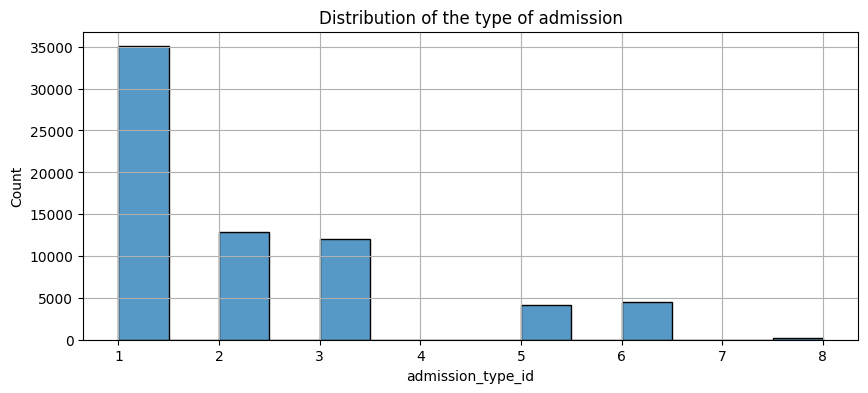

In [ ]:
plt.figure(figsize = (10, 4))
sns.histplot(x = 'admission_type_id', data = diabetes_df, binwidth = 0.5)
plt.grid(True)
plt.title('Distribution of the type of admission')

Text(0.5, 1.0, 'Distribution of the type of admission')

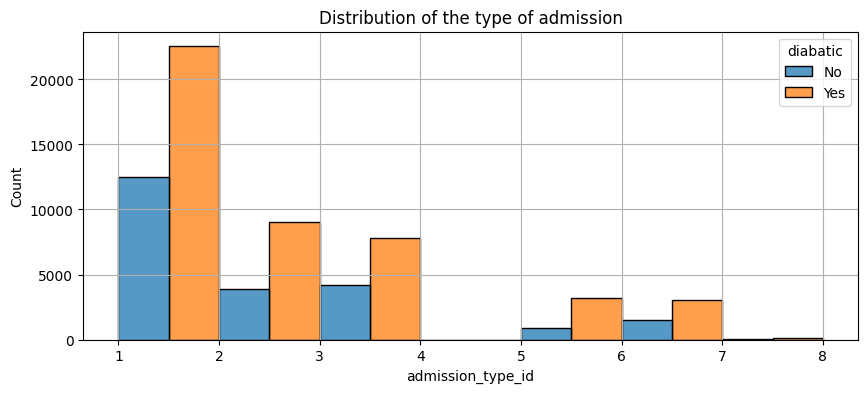

In [ ]:
plt.figure(figsize = (10, 4))
sns.histplot(x = 'admission_type_id', data = diabetes_df, hue = 'diabatic', multiple = 'dodge', binwidth = 1)
plt.grid(True)
plt.title('Distribution of the type of admission')

* 'admission_type_id' represents different types of admission. It has 8 unique integer values.

* The most common admission type is '1' (Emergency), accounting for approximately 51.0% of admissions, followed by type '2' (Urgent) at 18.7%, type '3' (Elective) at 17.4%, type '6' (NULL) at 6.6%, type '5' (Not Available) at 5.9%, type '8' (Not Mapped) at 0.2%, type '4' (Newborn) at 0.01% and type '7' (Trauma Center) at 0.01% .

* Patients having admission type - '1' (Emergency) and '5' (Not Available) are non diabatic whereas majority of patients having admission type - '2' (Urgent), '3' (Elective), '4' (Newborn), '6' (NULL), '7' (Trauma Center), '8' (Not Mapped) are diabatic.

In [ ]:
print(f"The number of unique values in discharge_disposition_id are: {diabetes_df['discharge_disposition_id'].nunique()}\n")

print(f"Unique values of discharge_disposition_id are: {diabetes_df['discharge_disposition_id'].unique()}\n")

print(f"Count of discharge_disposition_id :\n {diabetes_df['discharge_disposition_id'].value_counts()}\n")

print(f"Distribution of discharge_disposition_id in  :\n {diabetes_df['discharge_disposition_id'].value_counts(normalize = True)}\n")

The number of unique values in discharge_disposition_id are: 26

Unique values of discharge_disposition_id are: [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]

Count of discharge_disposition_id :
 discharge_disposition_id
1     40474
3      8512
6      8106
18     3659
2      1488
11     1233
22     1190
5       996
25      963
4       634
7       413
23      302
13      221
14      219
8       105
28       80
15       53
24       18
17       14
16       11
9         8
10        6
19        5
12        3
27        3
20        2
Name: count, dtype: int64

Distribution of discharge_disposition_id in  :
 discharge_disposition_id
1     0.588987
3     0.123869
6     0.117960
18    0.053247
2     0.021654
11    0.017943
22    0.017317
5     0.014494
25    0.014014
4     0.009226
7     0.006010
23    0.004395
13    0.003216
14    0.003187
8     0.001528
28    0.001164
15    0.000771
24    0.000262
17    0.000204
16    0.000160
9     0.000116
10    0.000087
19

Text(0.5, 1.0, 'Distribution of the type of discharge disposition')

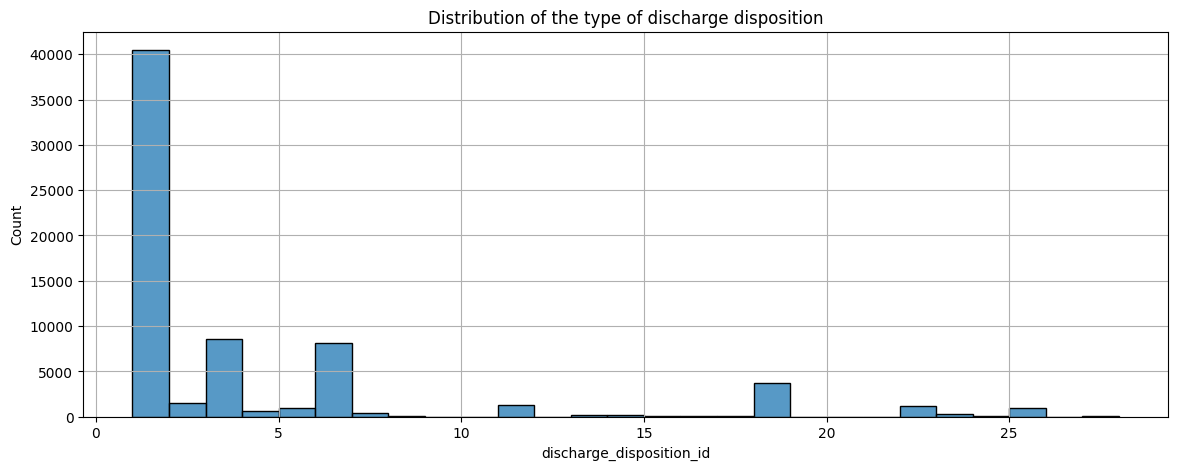

In [ ]:
plt.figure(figsize = (14, 5))
sns.histplot(x = 'discharge_disposition_id', data = diabetes_df, binwidth = 1)
plt.grid(True)
plt.title('Distribution of the type of discharge disposition')

Text(0.5, 1.0, 'Distribution of the type of discharge disposition')

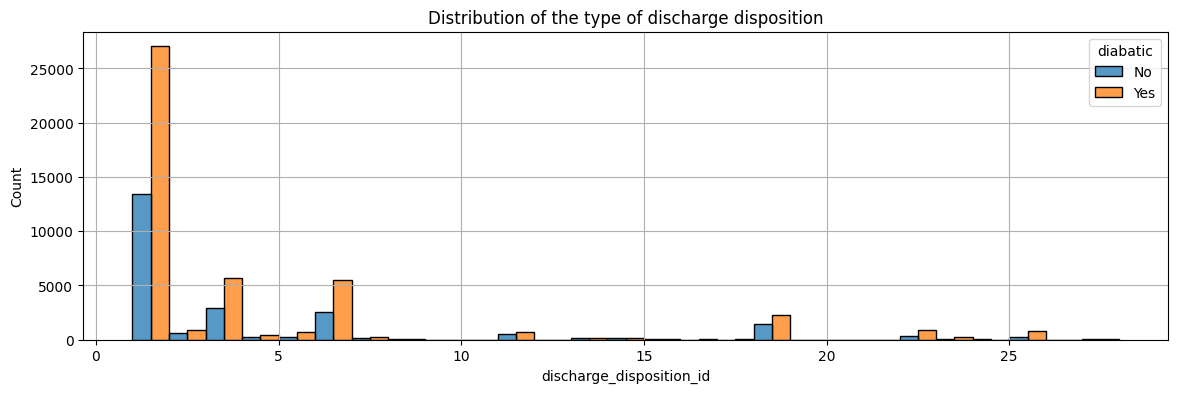

In [ ]:
plt.figure(figsize = (14, 4))
sns.histplot(x = 'discharge_disposition_id', data = diabetes_df, hue = 'diabatic', multiple = 'dodge', binwidth = 1)
plt.grid(True)
plt.title('Distribution of the type of discharge disposition')

* discharge_disposition_id indicates the circumstances of patient discharge, with 26 unique integer values.

* The most frequent discharge disposition is '1' (Discharged to home), representing about 59.0% of cases. Other common dispositions include '3' (Discharged/transferred to SNF) at 12.4% and '6' (Discharged/transferred to home with home health service) at 11.8%.

* Most diabetic patient's disposition is '1' (Discharged to home) followed by '3' (Discharged/transferred to SNF), '6' (Discharged/transferred to home with home health service), '11' (Expired), '22' (Discharged/transferred to another rehab fac including rehab units of a hospital), '5' (Discharged/transferred to another type of inpatient care institution) and '25' (Not Mapped)

In [ ]:
print(f"The number of unique values in admission_source_id are {diabetes_df['admission_source_id'].nunique()}\n")

print(f"The unique values in admission_source_id : {diabetes_df['admission_source_id'].unique()}\n")

print(f"Count of the unique values in admission_source_id : \n{diabetes_df['admission_source_id'].value_counts()}\n")

print(f"Distribution of admission_source : \n{diabetes_df['admission_source_id'].value_counts(normalize = True)}\n")

The number of unique values in admission_source_id are 13

The unique values in admission_source_id : [ 1  7  2  4  5  6 20  3 17  8  9 14 10]

Count of the unique values in admission_source_id : 
admission_source_id
7     36041
1     20072
17     6215
4      2447
6      1848
2       999
5       700
3       177
20      159
9        48
8         8
14        2
10        2
Name: count, dtype: int64

Distribution of admission_source : 
admission_source_id
7     0.524477
1     0.292092
17    0.090442
4     0.035609
6     0.026893
2     0.014538
5     0.010187
3     0.002576
20    0.002314
9     0.000699
8     0.000116
14    0.000029
10    0.000029
Name: proportion, dtype: float64



Text(0.5, 1.0, 'Distribution of the type of admission')

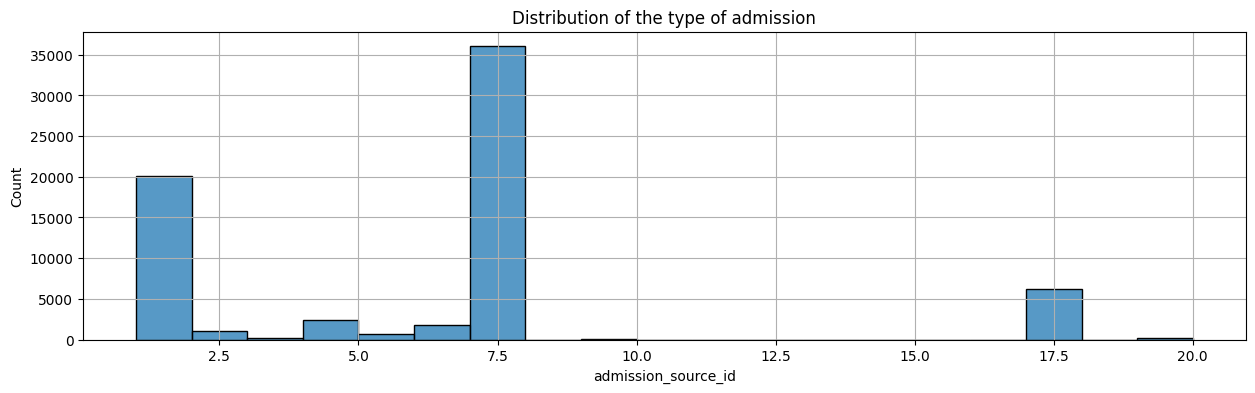

In [ ]:
plt.figure(figsize = (15, 4))
sns.histplot(x = 'admission_source_id', data = diabetes_df, binwidth = 1)
plt.grid(True)
plt.title('Distribution of the type of admission')

Text(0.5, 1.0, 'Distribution of the type of admission')

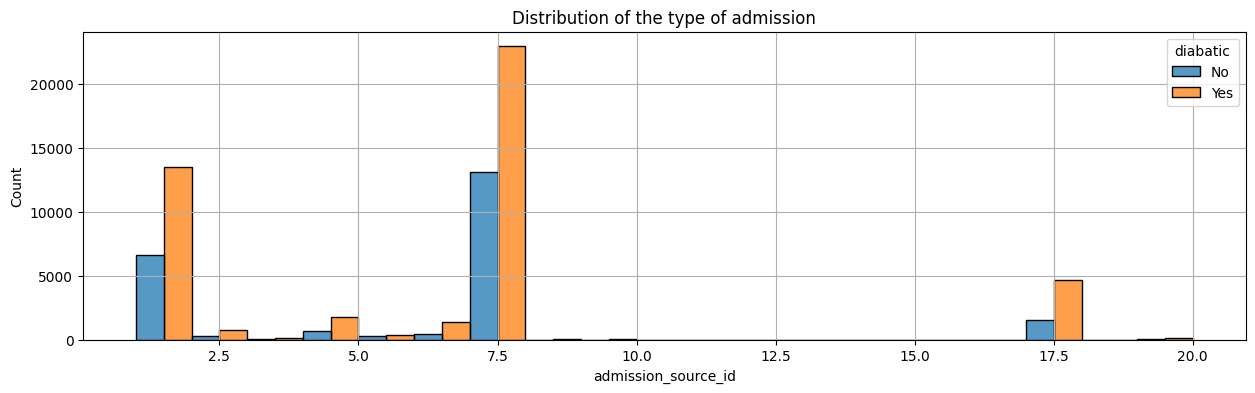

In [ ]:
plt.figure(figsize = (15, 4))
sns.histplot(x = 'admission_source_id', data = diabetes_df, hue = 'diabatic', multiple = 'dodge', binwidth = 1)
plt.grid(True)
plt.title('Distribution of the type of admission')

* This column identifies the source of admission, with 13 unique integer values.
* The most common admission source is '7' (Emergency Room), accounting for approximately 52.4% of admissions, followed by '1' (Physician Referral) at 29.2%, followed by '17' (NULL) at 9 %, followed by '4' (Transfer from a hospital) at 3.6%, followed by '2' (Clinic Referral) at 1.4%, followed by '5' (Transfer from a Skilled Nursing Facility (SNF)) at 1%.

* Most of the people having common admission source '7' (Emergency Room), '1' (Physician Referral), '17' (NULL), '4' (Transfer from a hospital), '2' (Clinic Referral), '5' (Transfer from a Skilled Nursing Facility (SNF)) are diabatic.


In [ ]:
print(f"The number of unique values in time_in_hospital are {diabetes_df['time_in_hospital'].nunique()}\n")

print(f"The unique values in time_in_hospital : \n{diabetes_df['time_in_hospital'].unique()}\n")

print(f"Count of the unique values in time_in_hospital : \n{diabetes_df['time_in_hospital'].value_counts()}\n")

print(f"Distribution of time_in_hospital : \n{diabetes_df['time_in_hospital'].value_counts(normalize = True)}")

The number of unique values in time_in_hospital are 14

The unique values in time_in_hospital : 
[ 1  3  2  4  5 13 12  9  7 10 11  6  8 14]

Count of the unique values in time_in_hospital : 
time_in_hospital
2     11598
3     11542
1      9743
4      9272
5      6667
6      5116
7      3971
8      3073
9      2064
10     1660
11     1353
12     1067
13      858
14      734
Name: count, dtype: int64

Distribution of time_in_hospital : 
time_in_hospital
2     0.168777
3     0.167962
1     0.141782
4     0.134928
5     0.097020
6     0.074449
7     0.057787
8     0.044719
9     0.030036
10    0.024157
11    0.019689
12    0.015527
13    0.012486
14    0.010681
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Distribution of the number of days spend in hospital')

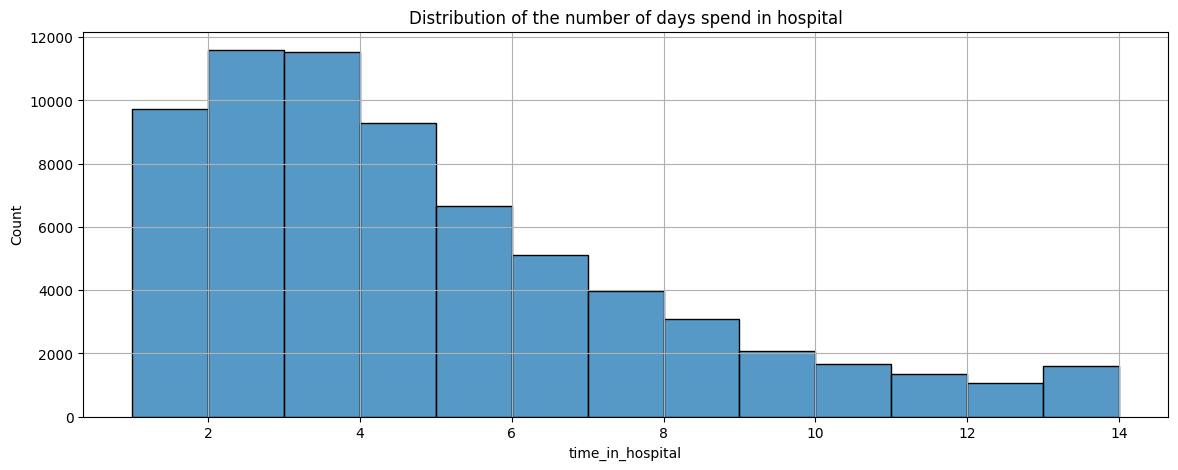

In [ ]:
plt.figure(figsize = (14, 5))
sns.histplot(x = 'time_in_hospital', data = diabetes_df, binwidth = 1)
plt.grid(True)
plt.title('Distribution of the number of days spend in hospital')

Text(0.5, 1.0, 'Distribution of the number of days spend in hospital')

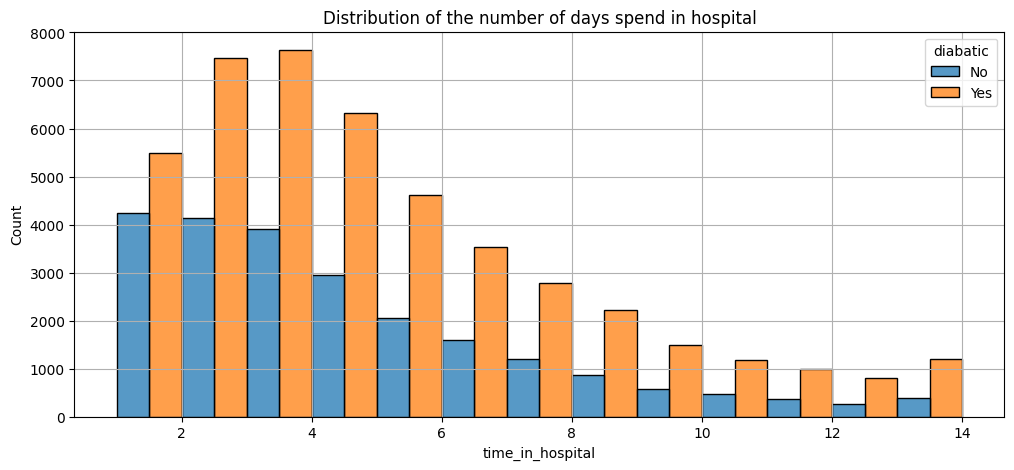

In [ ]:
plt.figure(figsize = (12, 5))
sns.histplot(x = 'time_in_hospital', data = diabetes_df, hue = 'diabatic', multiple = 'dodge', binwidth = 1)
plt.grid(True)
plt.title('Distribution of the number of days spend in hospital')

* This numerical column represents the number of days a patient spent in the hospital, with 14 unique values ranging from 1 to 14 days.
* The most common durations are 2 days (approx. 16.9%) and 3 days (approx. 16.8% after NaN removal). The distribution shows a peak at lower durations and then gradually decreases.
* Most diabatic patients spend 3 days followed by 2, 4, 1, 5, 6, 7, 8, 9, 13, 10, 11, 12, 14 days in hospital.

In [ ]:
print(f"The number of unique values in num_lab_procedures are {diabetes_df['num_lab_procedures'].nunique()}\n")

print(f"The unique values in num_lab_procedures : \n{diabetes_df['num_lab_procedures'].unique()}\n")

print(f"Count of the unique values in num_lab_procedures : \n{diabetes_df['num_lab_procedures'].value_counts()}\n")

print(f"Distribution of num_lab_procedures : \n{diabetes_df['num_lab_procedures'].value_counts(normalize = True)}")

The number of unique values in num_lab_procedures are 116

The unique values in num_lab_procedures : 
[ 41  59  11  44  51  31  70  73  68  33  47  62  60  55  49  75  45  29
  35  42  19  64  25  53  52  87  27  37  46  28  36  48  72  10   2  65
  67  40  58  57  32  83  34  39  69  38  56  22  96  78  61  88  66  43
  50   1  18  82  54   9  63  24  71  77  81  76  90  93   3 103  13  80
  85  16  15  12  30  23  17  21  79  26  95  97  84  14  74 105  86  98
  20   5   6  94   8 102 100   7  89  91  92   4 101  99 114 113 111 129
 107 108 106 104 109 120 126 118]

Count of the unique values in num_lab_procedures : 
num_lab_procedures
43     2059
44     1821
1      1778
45     1658
38     1606
       ... 
108       1
107       1
120       1
126       1
118       1
Name: count, Length: 116, dtype: int64

Distribution of num_lab_procedures : 
num_lab_procedures
43     0.029963
44     0.026500
1      0.025874
45     0.024128
38     0.023371
         ...   
108    0.000015
107    0.0000

Text(0.5, 1.0, 'Distribution of the number of lab tests performed during the stay in the hospital')

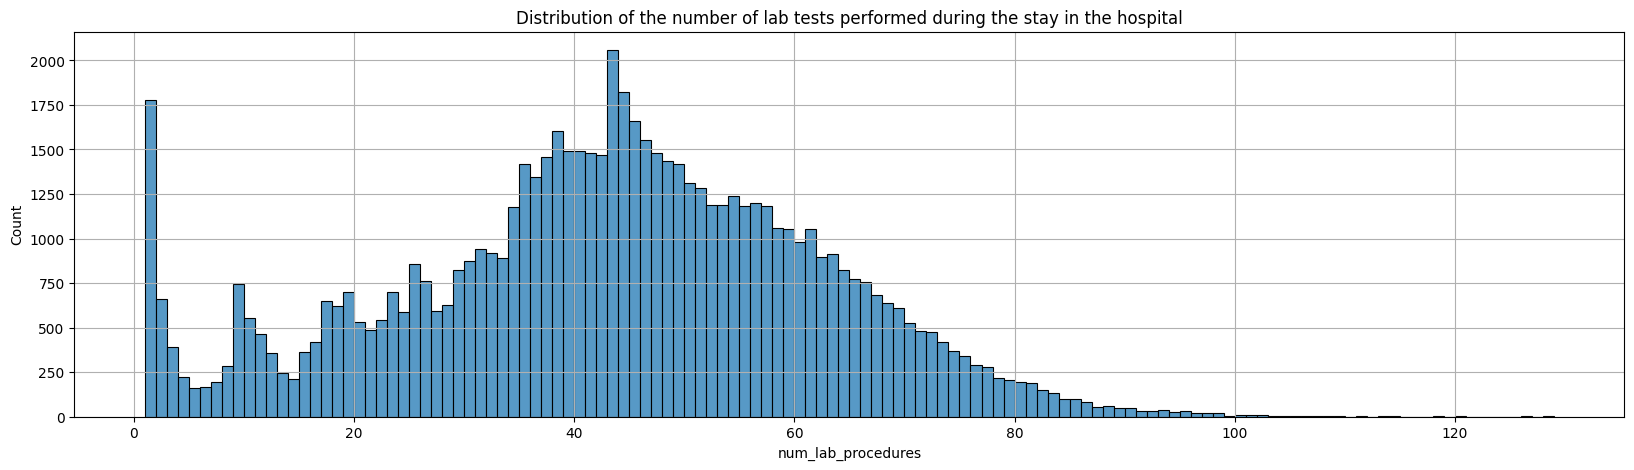

In [ ]:
plt.figure(figsize = (20, 5))
sns.histplot(x = 'num_lab_procedures', data = diabetes_df, binwidth = 1)
plt.grid(True)
plt.title('Distribution of the number of lab tests performed during the stay in the hospital')

Text(0.5, 1.0, 'Distribution of the number of lab tests performed during the stay in the hospital')

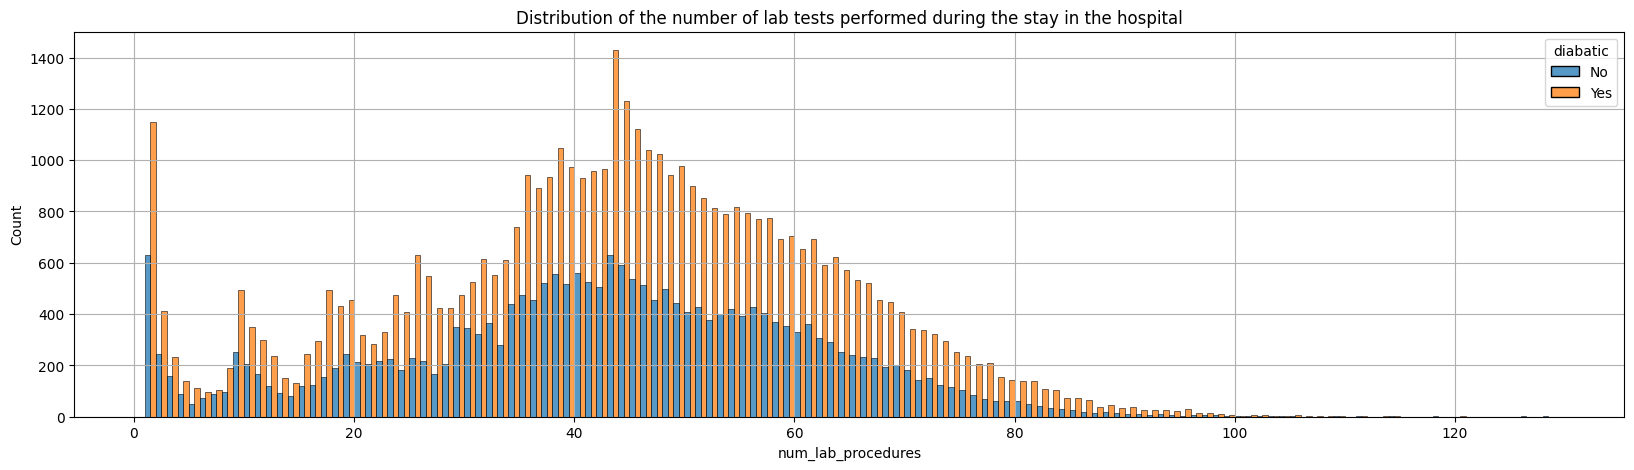

In [ ]:
plt.figure(figsize = (20, 5))
sns.histplot(x = 'num_lab_procedures', data = diabetes_df, hue = 'diabatic', multiple = 'dodge', binwidth = 1)
plt.grid(True)
plt.title('Distribution of the number of lab tests performed during the stay in the hospital')

* This column indicates the number of lab tests performed, with 116 unique values.

* The distribution shows varying number of lab procedures performed on a patient are 43, 44, 1, 45, 38, 46, 39, 40, 47, 48 etc.

* For a diabatic patient number of lab procedures performed are 43, 44, 1, 45, 38, 46, 47, 39, 49 etc.


In [ ]:
print(f"The number of unique values in num_procedures are {diabetes_df['num_procedures'].nunique()}\n")

print(f"The unique values in num_procedures : \n{diabetes_df['num_procedures'].unique()}\n")

print(f"Count of the unique values in num_procedures : \n{diabetes_df['num_procedures'].value_counts()}\n")

print(f"Distribution of num_procedures : \n{diabetes_df['num_procedures'].value_counts(normalize = True)}\n")

The number of unique values in num_procedures are 7

The unique values in num_procedures : 
[0 5 1 6 2 3 4]

Count of the unique values in num_procedures : 
num_procedures
0    30782
1    14302
2     8768
3     6767
6     2963
4     2837
5     2299
Name: count, dtype: int64

Distribution of num_procedures : 
num_procedures
0    0.447947
1    0.208126
2    0.127594
3    0.098475
6    0.043118
4    0.041285
5    0.033456
Name: proportion, dtype: float64



Text(0.5, 1.0, 'Distribution of the number of procedures (other than lab tests) performed during the stay in the hospital')

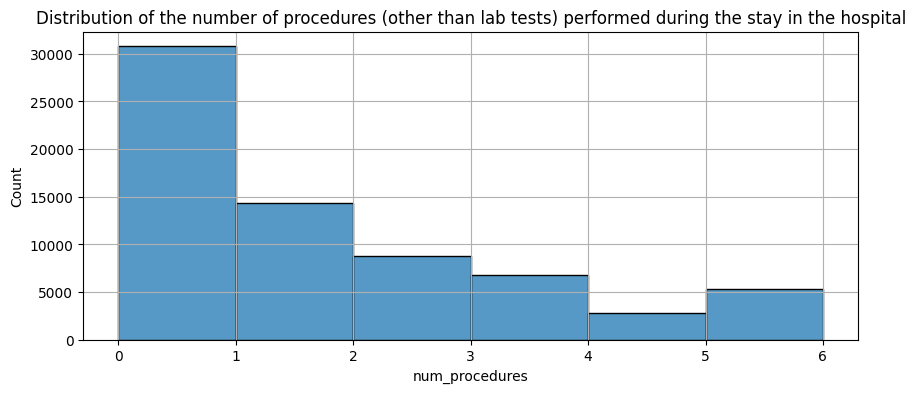

In [ ]:
plt.figure(figsize = (10, 4))
sns.histplot(x = 'num_procedures', data = diabetes_df, binwidth = 1)
plt.grid(True)
plt.title('Distribution of the number of procedures (other than lab tests) performed during the stay in the hospital')

Text(0.5, 1.0, 'Distribution of the number of procedures performed during the stay in the hospital for both diabetic and non diabetic')

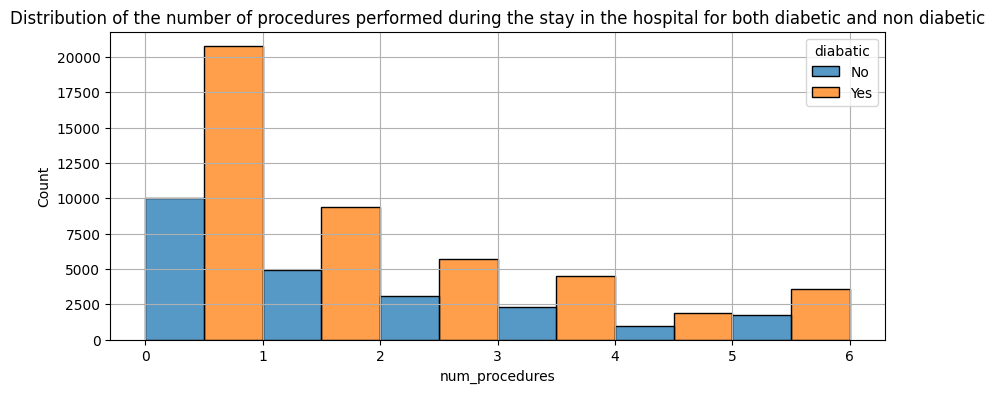

In [ ]:
plt.figure(figsize = (10, 4))
sns.histplot(x = 'num_procedures', data = diabetes_df, hue = 'diabatic', multiple = 'dodge', binwidth = 1)
plt.grid(True)
plt.title('Distribution of the number of procedures performed during the stay in the hospital for both diabetic and non diabetic')

* This column represents the number of procedures (other than lab tests) performed, with 7 unique values (0 to 6).

* A significant portion of patients had 0 procedures followed by 1, 2, 3, etc.

* A significant portion of diabatic patients had 0 procedures followed by 1, 2, 4, etc.


In [ ]:
print(f"The number of unique values in num_medications are {diabetes_df['num_medications'].nunique()}\n")

print(f"The unique values in num_medications : \n{diabetes_df['num_medications'].unique()}\n")

print(f"Count of the unique values in num_medications : \n{diabetes_df['num_medications'].value_counts()}\n")

print(f"Distribution of the num_medications : \n{diabetes_df['num_medications'].value_counts(normalize = True)}\n")

The number of unique values in num_medications are 74

The unique values in num_medications : 
[ 1 18 13 16  8 21 12 28 17 11 15 31  2 23 19  7 20 14 10 22  9 27 25  4
 32  6 30 26 24 33  5 39  3 29 61 40 46 41 36 34 35 50 43 42 37 51 38 45
 54 52 49 62 55 47 44 48 57 53 59 56 63 58 70 67 64 60 69 65 68 66 81 79
 75 72]

Count of the unique values in num_medications : 
num_medications
12    4239
13    4160
11    4106
10    3879
14    3876
      ... 
70       2
81       1
79       1
75       1
72       1
Name: count, Length: 74, dtype: int64

Distribution of the num_medications : 
num_medications
12    0.061687
13    0.060537
11    0.059751
10    0.056448
14    0.056404
        ...   
70    0.000029
81    0.000015
79    0.000015
75    0.000015
72    0.000015
Name: proportion, Length: 74, dtype: float64



Text(0.5, 1.0, 'Distribution of the number of distinct generic names administered during the encounter')

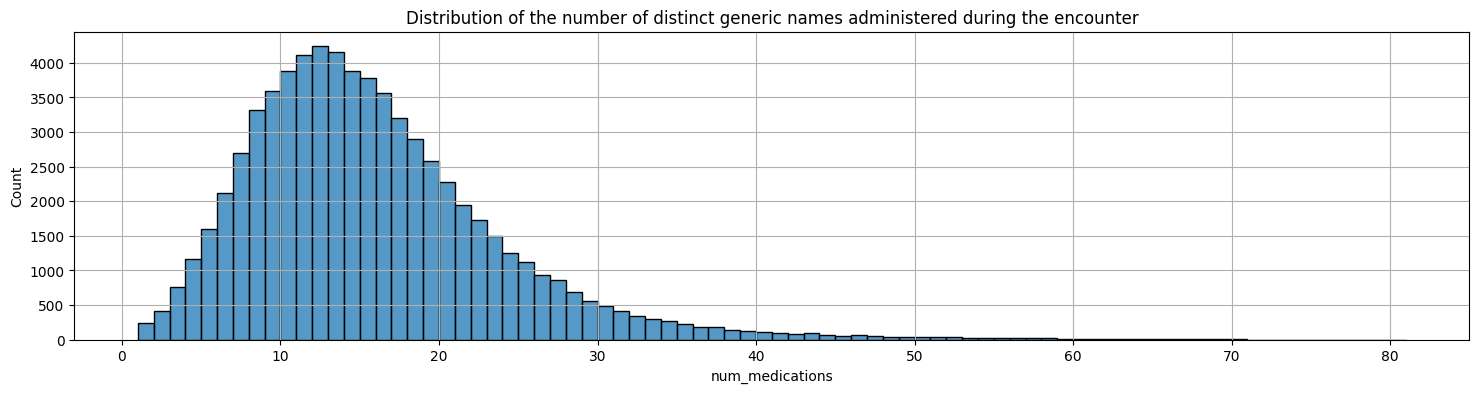

In [ ]:
plt.figure(figsize = (18, 4))
sns.histplot(x = 'num_medications', data = diabetes_df, binwidth = 1)
plt.grid(True)
plt.title('Distribution of the number of distinct generic names administered during the encounter')

Text(0.5, 1.0, 'Distribution of the number of distinct generic names administered to both diabetic and non diabetic during the encounter')

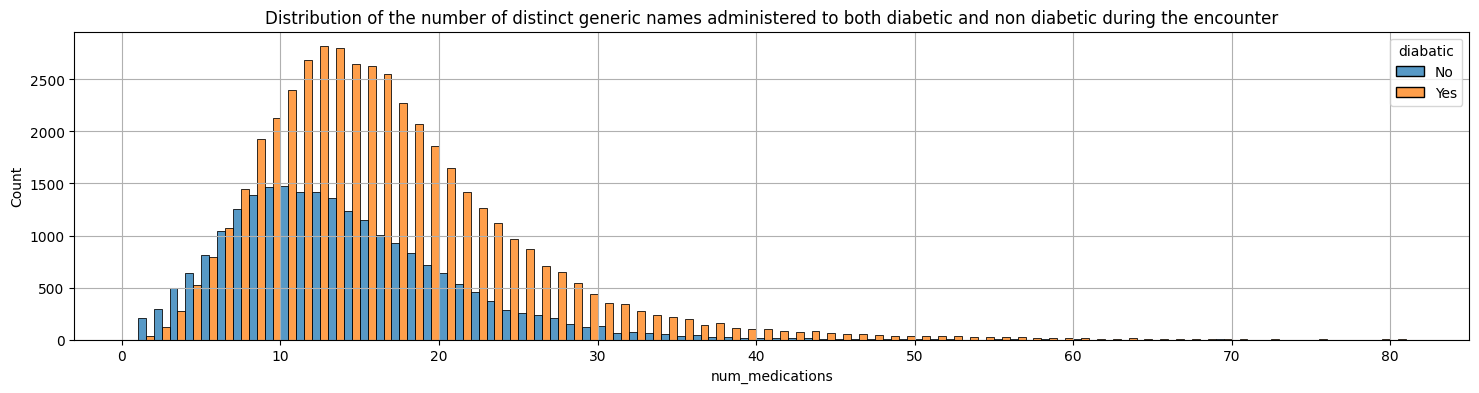

In [ ]:
plt.figure(figsize = (18, 4))
sns.histplot(x = 'num_medications', data = diabetes_df, hue = 'diabatic', multiple = 'dodge', binwidth = 1)
plt.grid(True)
plt.title('Distribution of the number of distinct generic names administered to both diabetic and non diabetic during the encounter')

* This column indicates the number of distinct medications administered, with 74 unique values.

* Most of the patients had 12 distinct medications administered followed by 13, 11, 10, 14, 15, 9 etc.

* Most of the diabatic patients had 12 distinct medications administered followed by 13, 11, 14, 15, 16, 10, 17, 9 etc.

In [ ]:
print(f"The number of unique values in number_outpatient are {diabetes_df['number_outpatient'].nunique()}\n")

print(f"The unique values in number_outpatient : \n{diabetes_df['number_outpatient'].unique()}\n")

print(f"Count of the unique values in number_outpatient : \n{diabetes_df['number_outpatient'].value_counts()}\n")

print(f"Distribution of the unique values in number_outpatient : \n{diabetes_df['number_outpatient'].value_counts(normalize = True)}")

The number of unique values in number_outpatient are 29

The unique values in number_outpatient : 
[ 0  2  1  5  7  9  3  8  4 12 11  6 20 15 10 13 14 16 21 35 17 29 36 18
 19 27 22 24 26]

Count of the unique values in number_outpatient : 
number_outpatient
0     58920
1      5352
2      2022
3      1100
4       582
5       290
6       153
7        82
8        57
9        37
10       27
11       19
12       13
14       13
15       11
13       11
16        9
20        3
21        3
17        2
29        2
22        2
18        2
35        1
36        1
19        1
27        1
24        1
26        1
Name: count, dtype: int64

Distribution of the unique values in number_outpatient : 
number_outpatient
0     0.857417
1     0.077884
2     0.029425
3     0.016007
4     0.008469
5     0.004220
6     0.002226
7     0.001193
8     0.000829
9     0.000538
10    0.000393
11    0.000276
12    0.000189
14    0.000189
15    0.000160
13    0.000160
16    0.000131
20    0.000044
21    0.000044
17   

Text(0.5, 1.0, 'Distribution of the number of outpatient visits of the patient in the year preceding the encounter')

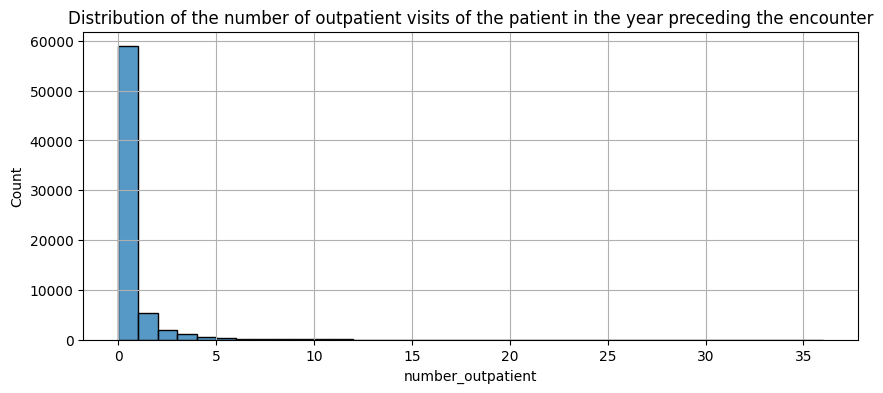

In [ ]:
plt.figure(figsize = (10, 4))
sns.histplot(x = 'number_outpatient', data = diabetes_df, binwidth = 1)
plt.grid(True)
plt.title('Distribution of the number of outpatient visits of the patient in the year preceding the encounter')

Text(0.5, 1.0, 'Distribution of the number of outpatient visits of the patient in the year preceding the encounter for both diabetic and non diabetic')

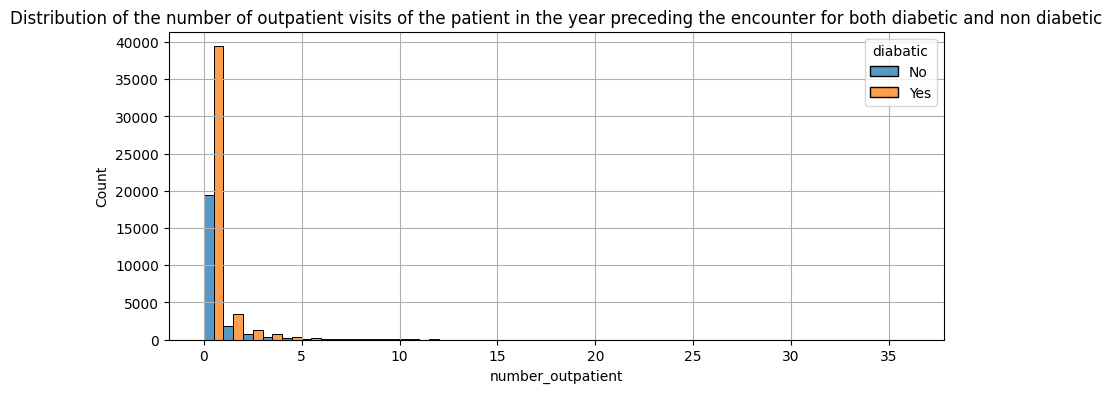

In [ ]:
plt.figure(figsize = (10, 4))
sns.histplot(x = 'number_outpatient', data = diabetes_df, hue = 'diabatic', multiple = 'dodge', binwidth = 1)
plt.grid(True)
plt.title('Distribution of the number of outpatient visits of the patient in the year preceding the encounter for both diabetic and non diabetic')

* This column records the number of outpatient visits in the year preceding the encounter, with 29 unique values.

* The vast majority of patients (approximately 85.7%) had 0 outpatient visits followed by 1, 2, 3, 4, 5 etc.

* Majority of diabatic patient also had 0 outpatient visits followed by 1, 2, 3, 4, 5 etc.


In [ ]:
print(f"The number of unique values in number_emergency are {diabetes_df['number_emergency'].nunique()}\n")

print(f"The unique values in number_emergency : {diabetes_df['number_emergency'].unique()}\n")

print(f"Count of the unique values in number_emergency : {diabetes_df['number_emergency'].value_counts()}\n")

print(f"Distribution of the unique values in number_emergency : \n{diabetes_df['number_emergency'].value_counts(normalize = True)}")

The number of unique values in number_emergency are 19

The unique values in number_emergency : [ 0  1  2  4  3  9  5  7  6  8 22 25 10 13 42 16 11 28 64]

Count of the unique values in number_emergency : number_emergency
0     62132
1      4540
2      1160
3       403
4       207
5        91
6        52
7        49
8        30
9        22
10       13
11        7
13        4
22        2
25        2
42        1
16        1
28        1
64        1
Name: count, dtype: int64

Distribution of the unique values in number_emergency : 
number_emergency
0     0.904159
1     0.066067
2     0.016881
3     0.005865
4     0.003012
5     0.001324
6     0.000757
7     0.000713
8     0.000437
9     0.000320
10    0.000189
11    0.000102
13    0.000058
22    0.000029
25    0.000029
42    0.000015
16    0.000015
28    0.000015
64    0.000015
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Distribution of the number of emergency visits of the patient in the year preceding the encounter')

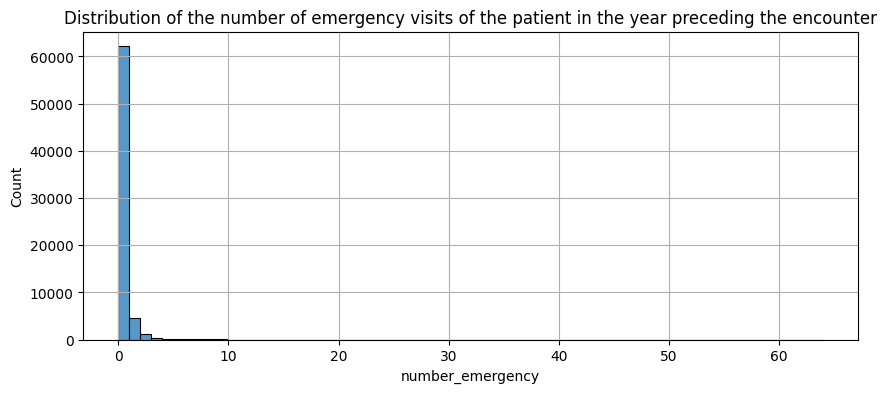

In [ ]:
plt.figure(figsize = (10, 4))
sns.histplot(x = 'number_emergency', data = diabetes_df, binwidth = 1)
plt.grid(True)
plt.title('Distribution of the number of emergency visits of the patient in the year preceding the encounter')

Text(0.5, 1.0, 'Distribution of the number of emergency visits of the diabetic & non diabetic patient in the year preceding the encounter')

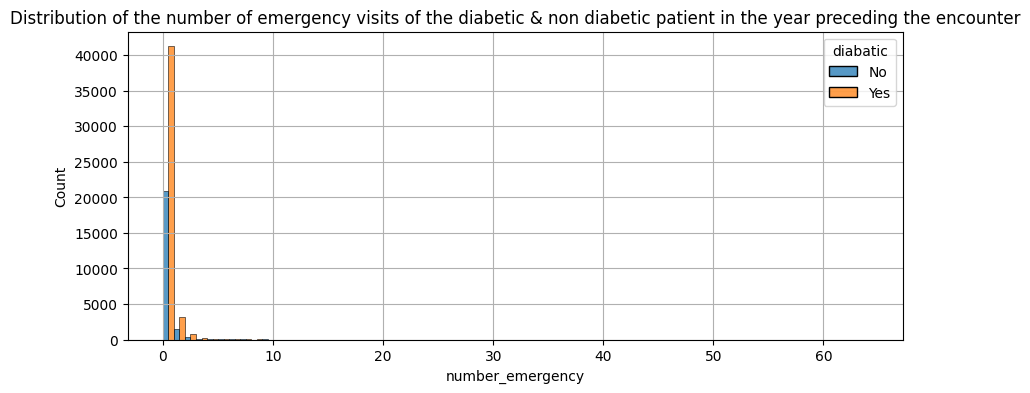

In [ ]:
plt.figure(figsize = (10, 4))
sns.histplot(x = 'number_emergency', data = diabetes_df, hue = 'diabatic', multiple = 'dodge', binwidth = 1)
plt.grid(True)
plt.title('Distribution of the number of emergency visits of the diabetic & non diabetic patient in the year preceding the encounter')

* This column shows the number of emergency visits in the year preceding the encounter, with 19 unique values.

* Similar to outpatient visits, vast majority of patients (approximately 90.4%) had 0 emergency visits followed by 1, 2, 3 etc.

* Similar to outpatient visits, vast majority of diabatic patients had 0 emergency visits followed by 1, 2, 3 etc.

In [ ]:
print(f"The number of unique values in number_inpatient are {diabetes_df['number_inpatient'].nunique()}\n")

print(f"The unique values in number_inpatient : \n{diabetes_df['number_inpatient'].unique()}\n")

print(f"Count of the unique values in number_inpatient : \n{diabetes_df['number_inpatient'].value_counts()}\n")

print(f"Distribution of the unique values in number_inpatient : \n{diabetes_df['number_inpatient'].value_counts(normalize = True)}")

The number of unique values in number_inpatient are 21

The unique values in number_inpatient : 
[ 0  1  2  3  6  5  4  7  8  9 15 10 11 14 12 13 17 16 21 18 19]

Count of the unique values in number_inpatient : 
number_inpatient
0     46312
1     12937
2      4927
3      2192
4      1040
5       531
6       316
7       177
8       106
9        67
10       39
11       25
12       17
13       13
14        6
15        4
16        4
19        2
17        1
21        1
18        1
Name: count, dtype: int64

Distribution of the unique values in number_inpatient : 
number_inpatient
0     0.673943
1     0.188262
2     0.071699
3     0.031898
4     0.015134
5     0.007727
6     0.004599
7     0.002576
8     0.001543
9     0.000975
10    0.000568
11    0.000364
12    0.000247
13    0.000189
14    0.000087
15    0.000058
16    0.000058
19    0.000029
17    0.000015
21    0.000015
18    0.000015
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Distribution of the number of inpatient visits of the patient in the year preceding the encounter')

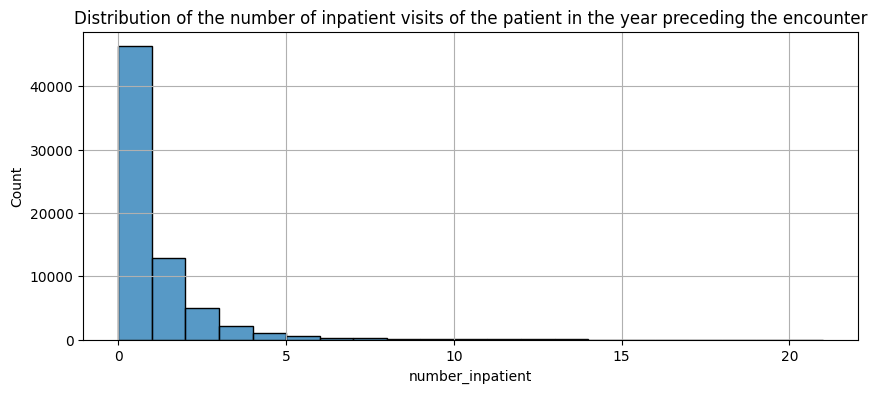

In [ ]:
plt.figure(figsize = (10, 4))
sns.histplot(x = 'number_inpatient', data = diabetes_df, binwidth = 1)
plt.grid(True)
plt.title('Distribution of the number of inpatient visits of the patient in the year preceding the encounter')

Text(0.5, 1.0, 'Distribution of the number of inpatient visits of a diabetic and non diabetic patient in the year preceding the encounter')

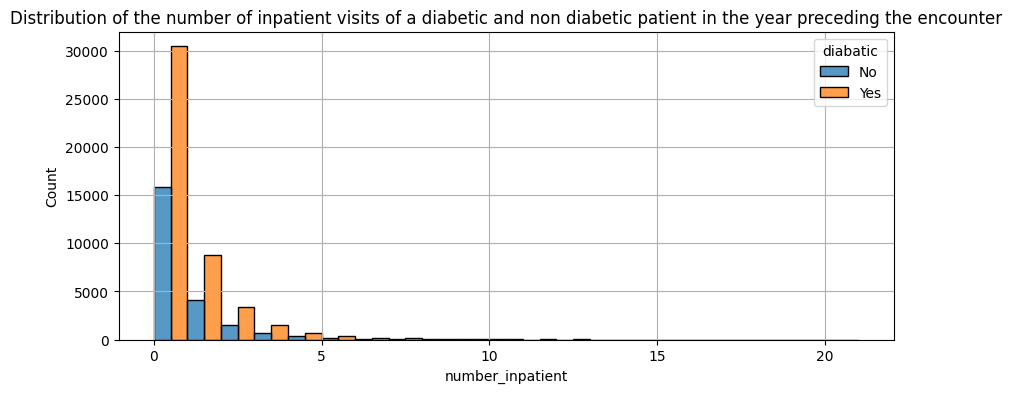

In [ ]:
plt.figure(figsize = (10, 4))
sns.histplot(x = 'number_inpatient', data = diabetes_df, hue = 'diabatic', multiple = 'dodge', binwidth = 1)
plt.grid(True)
plt.title('Distribution of the number of inpatient visits of a diabetic and non diabetic patient in the year preceding the encounter')

* This column records the number of inpatient visits in the year preceding the encounter, with 21 unique values.

* Majority of patients (approximately 67.4%) had 0 emergency visits followed by 1, 2, 3, 4 etc.

* Majority of diabatic patients had 0 emergency visits followed by 1, 2, 3, 4 etc.

In [ ]:
print(f"The number of unique values in number_diagnoses are {diabetes_df['number_diagnoses'].nunique()}\n")

print(f"The unique values in number_diagnoses : \n{diabetes_df['number_diagnoses'].unique()}\n")

print(f"Count of the unique values in number_diagnoses : \n{diabetes_df['number_diagnoses'].value_counts()}\n")

print(f"Distribution of the number of diagnoses entered to the system for a patient : \n{diabetes_df['number_diagnoses'].value_counts(normalize = True)}")


The number of unique values in number_diagnoses are 16

The unique values in number_diagnoses : 
[ 1  9  6  7  5  8  3  4  2 12 15 16 13 10 11 14]

Count of the unique values in number_diagnoses : 
number_diagnoses
9     29012
5      9010
6      7710
8      7655
7      7559
4      4387
3      2320
2       861
1       182
16        9
12        4
10        3
15        2
13        2
11        1
14        1
Name: count, dtype: int64

Distribution of the number of diagnoses entered to the system for a patient : 
number_diagnoses
9     0.422189
5     0.131116
6     0.112198
8     0.111397
7     0.110000
4     0.063841
3     0.033761
2     0.012529
1     0.002649
16    0.000131
12    0.000058
10    0.000044
15    0.000029
13    0.000029
11    0.000015
14    0.000015
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Number of diagnoses a patient undergone')

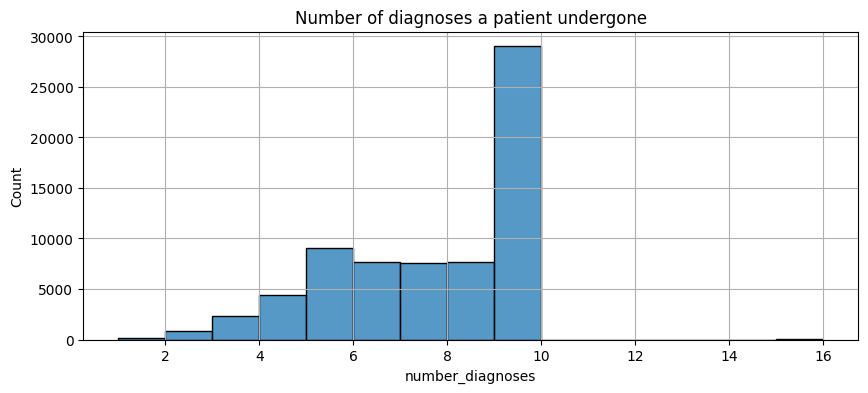

In [ ]:
plt.figure(figsize = (10, 4))
sns.histplot(x = 'number_diagnoses', data = diabetes_df, binwidth = 1)
plt.grid(True)
plt.title('Number of diagnoses a patient undergone')

Text(0.5, 1.0, 'Number of diagnoses a diabetic and non diabetic patient undergone')

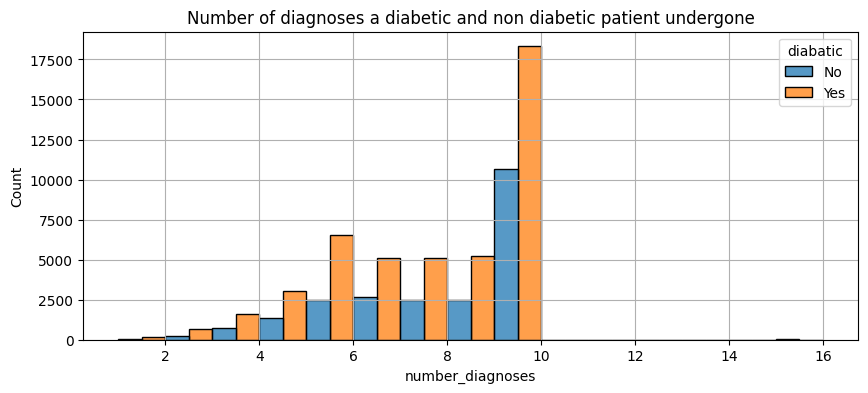

In [ ]:
plt.figure(figsize = (10, 4))
sns.histplot(x = 'number_diagnoses', data = diabetes_df, hue = 'diabatic', multiple = 'dodge', binwidth = 1)
plt.grid(True)
plt.title('Number of diagnoses a diabetic and non diabetic patient undergone')

* This column indicates the total number of diagnoses entered for the patient, with 16 unique values.

* Majority of patients (approximately 42.2%) had 9 diagnoses followed by 5, 6, 8, 7, 4 etc.

* Majority of diabatic patients had 9, 5, 8, 7, 6, 4 etc.

In [ ]:
print(f"The number of unique values in diag_1 are {diabetes_df['diag_1'].nunique()}\n")

print(f"The unique values in diag_1 : \n{diabetes_df['diag_1'].unique()}\n")

print(f"Count of the unique values in diag_1 : \n{diabetes_df['diag_1'].value_counts()}\n")

print(f"Distribution of diag_1 : \n{diabetes_df['diag_1'].value_counts(normalize = True)}\n")

The number of unique values in diag_1 are 683

The unique values in diag_1 : 
['250.83' '276' '648' '8' '197' '414' '428' '398' '434' '250.7' '157'
 '518' '999' '410' '682' '402' 'V57' '189' '786' '427' '996' '277' '584'
 '462' '473' '411' '174' '486' '998' '511' '432' '626' '295' '196' '250.6'
 '182' '845' '423' '808' '250.4' '722' '403' '250.11' '784' '707' '440'
 '151' '715' '997' '198' '564' '38' '590' '578' '250.32' '433' '569' '185'
 '536' '255' '250.13' '599' '558' '574' '491' '560' '244' '250.03' '577'
 '730' '188' '824' '250.8' '332' '562' '291' '296' '510' '401' '263' '438'
 '70' '250.02' '493' '642' '571' '738' '593' '618' '250.42' '807' '456'
 '446' '572' '575' '250.41' '820' '515' '780' '250.22' '995' '235'
 '250.82' '721' '787' '556' '162' '724' '282' '514' 'V55' '281' '250.33'
 '530' '466' '435' '250.12' 'V53' '789' '566' '822' '191' '557' '733'
 '455' '711' '482' '202' '280' '553' '154' '441' '250.81' '349' '?' '962'
 '592' '507' '386' '156' '200' '728' '459' '426' '607

In [ ]:
# Replacing '?' with NaN

diabetes_df['diag_1'] = diabetes_df['diag_1'].replace(to_replace='?', value=np.nan)

# Remove rows with NaN values
diabetes_df.dropna(inplace=True)

In [ ]:
grouped_by_diag1 = diabetes_df.groupby('diag_1')

# To iterate through the groups:
for name, group in grouped_by_diag1:
    print(f"group : {name}")

    group_by_diabetic = group.groupby('diabatic')
    for diabetic, group_1 in group_by_diabetic:
      print(f"Diabetic: {diabetic}, size : {group_1.shape[0]}")

    print("\n")


group : 11
Diabetic: No, size : 4
Diabetic: Yes, size : 4


group : 110
Diabetic: Yes, size : 1


group : 112
Diabetic: No, size : 15
Diabetic: Yes, size : 32


group : 115
Diabetic: No, size : 1


group : 117
Diabetic: No, size : 2
Diabetic: Yes, size : 5


group : 131
Diabetic: Yes, size : 2


group : 135
Diabetic: No, size : 3
Diabetic: Yes, size : 14


group : 136
Diabetic: No, size : 1
Diabetic: Yes, size : 2


group : 141
Diabetic: Yes, size : 5


group : 142
Diabetic: No, size : 2
Diabetic: Yes, size : 2


group : 143
Diabetic: Yes, size : 1


group : 145
Diabetic: Yes, size : 1


group : 146
Diabetic: No, size : 1
Diabetic: Yes, size : 2


group : 147
Diabetic: Yes, size : 1


group : 148
Diabetic: No, size : 1


group : 149
Diabetic: No, size : 1


group : 150
Diabetic: No, size : 7
Diabetic: Yes, size : 8


group : 151
Diabetic: No, size : 19
Diabetic: Yes, size : 27


group : 152
Diabetic: No, size : 4
Diabetic: Yes, size : 5


group : 153
Diabetic: No, size : 97
Diabetic: Y

* This column represent the primary diagnoses, coded typically using ICD codes.

* diag_1 has 683 unique values, indicating a wide variety of primary diagnoses.

* Top 5 primary diagnoses are 414 (4821 tests performed), 428 (4757 tests performed), 786 (2989 tests performed), 410 (2541 tests performed), 486 (2303 tests performed).

* Results of primary diagnoses -
  * Test : 414 -
    Diabetic: No, count : 1494,
    Diabetic: Yes, count : 3327

  * Test : 428 -
    Diabetic: No, count : 1491,
    Diabetic: Yes, count : 3266

  * Test : 786 -
    Diabetic: No, count : 1062,
    Diabetic: Yes, count : 1927

  * Test : 410 -
    Diabetic: No, count : 782,
    Diabetic: Yes, count : 1759

  * Test : 486 -
    Diabetic: No, count : 640,
    Diabetic: Yes, count : 1663

In [ ]:
print(f"The number of unique values in diag_2 are {diabetes_df['diag_2'].nunique()}\n")

print(f"The unique values in diag_2 : \n{diabetes_df['diag_2'].unique()}\n")

print(f"Count of the unique values in diag_2 : \n{diabetes_df['diag_2'].value_counts()}\n")

print(f"Distribution of diag_2 : \n{diabetes_df['diag_2'].value_counts(normalize = True)}\n")

The number of unique values in diag_2 are 701

The unique values in diag_2 : 
['?' '250.01' '250' '250.43' '157' '411' '492' '427' '198' '403' '288'
 '998' '507' '174' '425' '401' '715' '496' '428' '585' '250.02' '410'
 '999' '996' '135' '244' '41' '571' '276' '997' '599' '424' '491' '553'
 '707' '286' '440' '493' '242' '70' 'V45' '250.03' '357' '511' '196' '396'
 '197' '414' '250.52' '577' '535' '413' '53' '780' '518' '566' '250.6'
 '867' '285' '486' 'V15' '8' '788' '340' '574' '581' '228' '530' '250.82'
 '786' '294' '567' '785' '512' '305' '250.51' '280' '648' '560' '444' '38'
 'V10' '578' '277' '781' '250.42' '278' '426' '584' '462' '402' '153'
 '272' '733' '34' '881' '203' '250.41' '250.13' '729' '293' '245' '250.12'
 '558' '787' '342' '573' '626' '303' '250.53' '458' '710' '415' 'V42'
 '284' '569' '759' '682' '112' '292' '435' '290' '250.93' '642' '536'
 '398' '319' '711' 'E878' '446' '255' 'V44' '250.7' '300' '562' '162'
 '287' '447' '789' '790' '591' '200' '154' '304' '117' '847

In [ ]:
# Replacing '?' with NaN

diabetes_df['diag_2'] = diabetes_df['diag_2'].replace(to_replace='?', value=np.nan)

# Remove rows with NaN values
diabetes_df.dropna(inplace=True)

In [ ]:
grouped_by_diag2 = diabetes_df.groupby('diag_2')

# To iterate through the groups:
for name, group in grouped_by_diag2:
    print(f"group : {name}")

    group_by_diabetic = group.groupby('diabatic')
    for diabetic, group_2 in group_by_diabetic:
      print(f"Diabetic: {diabetic}, size : {group_2.shape[0]}")

    print("\n")


group : 11
Diabetic: Yes, size : 2


group : 110
Diabetic: No, size : 3
Diabetic: Yes, size : 3


group : 111
Diabetic: No, size : 1


group : 112
Diabetic: No, size : 33
Diabetic: Yes, size : 92


group : 117
Diabetic: No, size : 2
Diabetic: Yes, size : 3


group : 130
Diabetic: Yes, size : 1


group : 131
Diabetic: No, size : 1
Diabetic: Yes, size : 1


group : 135
Diabetic: No, size : 21
Diabetic: Yes, size : 68


group : 136
Diabetic: No, size : 1
Diabetic: Yes, size : 4


group : 137
Diabetic: Yes, size : 1


group : 138
Diabetic: No, size : 6
Diabetic: Yes, size : 9


group : 141
Diabetic: No, size : 1


group : 150
Diabetic: No, size : 10
Diabetic: Yes, size : 11


group : 151
Diabetic: No, size : 9
Diabetic: Yes, size : 7


group : 152
Diabetic: No, size : 6
Diabetic: Yes, size : 3


group : 153
Diabetic: No, size : 31
Diabetic: Yes, size : 39


group : 154
Diabetic: No, size : 17
Diabetic: Yes, size : 15


group : 155
Diabetic: No, size : 11
Diabetic: Yes, size : 14


group : 

* This column represent the secondary diagnoses coded typically using ICD codes.

* diag_2 has 701 unique values, indicating a wide variety of secondary diagnoses.

* Top 5 secondary diagnoses are 428 (4691 tests performed), 276 (4554 tests performed), 250 (4288 tests performed), 427 (3466 tests performed) & 401 (2639 tests performed).

* Results of secondary diagnoses -
  * Test : 428 -
    Diabetic: No, count : 1455,
    Diabetic: Yes, count : 3236

  * Test : 276 -
    Diabetic: No count : 1436,
    Diabetic: Yes, count : 3118

  * Test : 250 -
    Diabetic: No, count : 1391,
    Diabetic: Yes, count : 2897

  * Test : 427 -
    Diabetic: No, count : 1176,
    Diabetic: Yes, count : 2290

  * Test : 401 -
    Diabetic: No, count : 949,
    Diabetic: Yes, count : 1690

In [ ]:
print(f"The number of unique values in diag_3 are {diabetes_df['diag_3'].nunique()}\n")

print(f"The unique values in diag_3 : \n{diabetes_df['diag_3'].unique()}\n")

print(f"Count of the unique values in diag_3 : \n{diabetes_df['diag_3'].value_counts()}\n")

print(f"Distribution of diag_3 : \n{diabetes_df['diag_3'].value_counts(normalize = True)}\n")

The number of unique values in diag_3 are 723

The unique values in diag_3 : 
['255' 'V27' '403' '250' 'V45' '38' '486' '996' '197' '250.6' '427' '627'
 '414' '416' '582' 'V43' '250.01' '263' '250.42' '276' '482' '401'
 '250.41' '585' '781' '278' '998' '428' '568' '682' '250.02' '305' '707'
 '496' '599' '424' '518' '553' '794' '411' 'V42' '531' '511' '490' '562'
 '250.8' '250.7' '250.52' '784' '491' '581' '420' '724' '730' '789' '131'
 '250.82' '999' '41' '493' '250.03' '753' '786' '529' 'E888' '425' '595'
 '303' '560' '711' '8' '492' '332' '296' '438' '?' '362' '250.4' '654'
 '244' 'V70' '737' '625' '681' '250.51' '404' 'V10' '810' '280' '440'
 '785' '569' '272' '997' '250.43' '918' '584' '54' '788' '426' '722'
 '250.92' '196' '461' '535' '787' '891' '284' '458' '648' '780' '182'
 '285' '593' '413' '664' '564' '201' '356' 'V15' '292' '782' '715' '473'
 '455' '714' 'E932' '357' '348' '294' '250.23' '459' 'E878' '437' '733'
 '507' '525' '250.53' '397' '572' '805' '453' '331' '736' '402'

In [ ]:
diabetes_df['diag_3'] = diabetes_df['diag_3'].replace(to_replace = '?', value = np.nan)

diabetes_df.dropna(inplace = True)

In [ ]:
grouped_by_diag3 = diabetes_df.groupby('diag_3')

# To iterate through the groups:
for name, group in grouped_by_diag3:
    print(f"group : {name}")

    group_by_diabetic = group.groupby('diabatic')
    for diabetic, group_3 in group_by_diabetic:
      print(f"Diabetic: {diabetic}, size : {group_3.shape[0]}")

    print("\n")


group : 11
Diabetic: No, size : 1
Diabetic: Yes, size : 1


group : 110
Diabetic: No, size : 4
Diabetic: Yes, size : 11


group : 112
Diabetic: No, size : 37
Diabetic: Yes, size : 100


group : 115
Diabetic: Yes, size : 1


group : 117
Diabetic: Yes, size : 2


group : 122
Diabetic: Yes, size : 1


group : 131
Diabetic: Yes, size : 2


group : 132
Diabetic: No, size : 2


group : 135
Diabetic: No, size : 18
Diabetic: Yes, size : 36


group : 136
Diabetic: Yes, size : 1


group : 138
Diabetic: No, size : 3
Diabetic: Yes, size : 9


group : 139
Diabetic: Yes, size : 1


group : 148
Diabetic: No, size : 1


group : 150
Diabetic: No, size : 4
Diabetic: Yes, size : 5


group : 151
Diabetic: No, size : 2
Diabetic: Yes, size : 3


group : 152
Diabetic: No, size : 1
Diabetic: Yes, size : 1


group : 153
Diabetic: No, size : 17
Diabetic: Yes, size : 20


group : 154
Diabetic: No, size : 4
Diabetic: Yes, size : 5


group : 155
Diabetic: No, size : 4
Diabetic: Yes, size : 5


group : 156
Diabetic

* This column represent the additional secondary diagnoses coded typically using ICD codes.

* diag_3 has 683 unique values, indicating a wide variety of additional secondary diagnoses.

* Top 5 additional secondary diagnoses are
250 (8075 tests performed), 401 (5887 tests performed), 276 (3301 tests performed), 428 (3158 tests performed) and 427 (2691 tests performed)

* Results of additional secondary diagnoses -
  * Test : 250 -
      Diabetic: No, count : 2651,
      Diabetic: Yes, count : 5424

  * Test : 401 -
      Diabetic: No, count : 1922,
      Diabetic: Yes, count : 3965

  * Test : 276 -
      Diabetic: No, count : 1050,
      Diabetic: Yes, count : 2251

  * Test : 428 -
      Diabetic: No, count : 930,
      Diabetic: Yes, count : 2228

  * Test : 427 -
      Diabetic: No, count : 883,
      Diabetic: Yes, count : 1808

In [ ]:
print(f"The number of unique values in change are {diabetes_df['change'].nunique()}\n")

print(f"The unique values in change : \n{diabetes_df['change'].unique()}\n")

print(f"Count of the unique values in change : \n{diabetes_df['change'].value_counts()}\n")

print(f"Distribution of the number of changes in the diabetic medications for a patient : \n{diabetes_df['change'].value_counts(normalize = True)}")

The number of unique values in change are 2

The unique values in change : 
['Ch' 'No']

Count of the unique values in change : 
change
No    42206
Ch    25265
Name: count, dtype: int64

Distribution of the number of changes in the diabetic medications for a patient : 
change
No    0.625543
Ch    0.374457
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Count plot indicating if there was a change in diabetic medications (either dosage or generic name) of a patient')

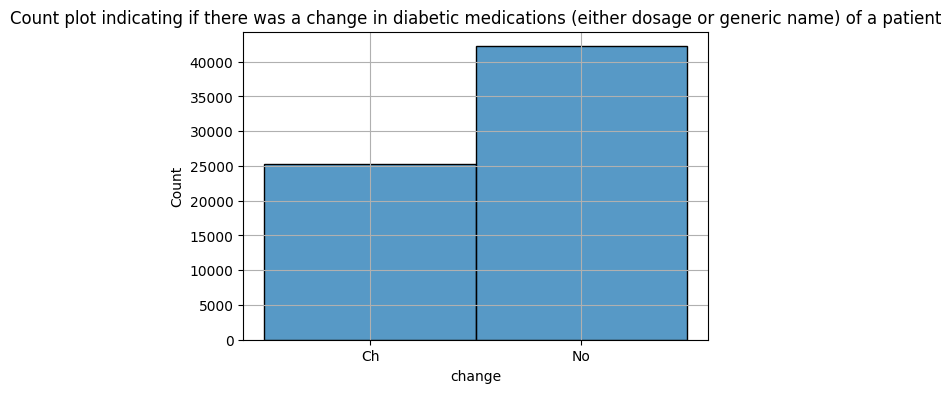

In [ ]:
plt.figure(figsize = (6, 4))
sns.histplot(x = 'change', data = diabetes_df, binwidth = 1)
plt.grid(True)
plt.title('Count plot indicating if there was a change in diabetic medications (either dosage or generic name) of a patient')

Text(0.5, 1.0, 'Count plot indicating if there was a change in diabetic medications (either dosage or generic name) of both diabetic and non diabetic patient')

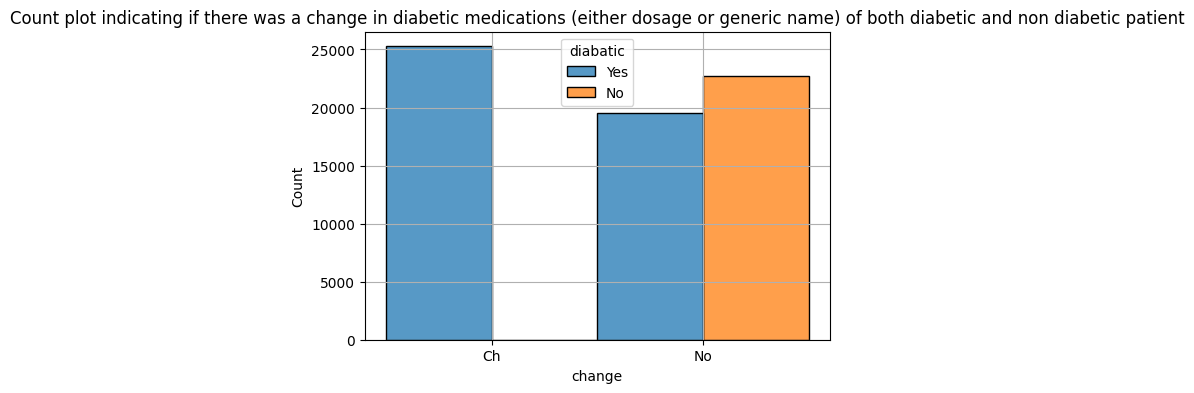

In [ ]:
plt.figure(figsize = (6, 4))
sns.histplot(x = 'change', data = diabetes_df, hue = 'diabatic', multiple = 'dodge', binwidth = 1)
plt.grid(True)
plt.title('Count plot indicating if there was a change in diabetic medications (either dosage or generic name) of both diabetic and non diabetic patient')

* This categorical column indicates if there was a change in diabetic medications ('Ch' for change, 'No' for no change).

* Majority of patients (approximately 62.6%) have no change in their diabatic medications.

* Majority of the diabatic patients had changes in their medications.

In [ ]:
# Are there any duplicates ?

dups = diabetes_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
diabetes_df[dups]

Number of duplicate rows = 0


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,change,diabatic


In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67471 entries, 1 to 70179
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      67471 non-null  object
 1   gender                    67471 non-null  object
 2   age                       67471 non-null  object
 3   admission_type_id         67471 non-null  int64 
 4   discharge_disposition_id  67471 non-null  int64 
 5   admission_source_id       67471 non-null  int64 
 6   time_in_hospital          67471 non-null  int64 
 7   num_lab_procedures        67471 non-null  int64 
 8   num_procedures            67471 non-null  int64 
 9   num_medications           67471 non-null  int64 
 10  number_outpatient         67471 non-null  int64 
 11  number_emergency          67471 non-null  int64 
 12  number_inpatient          67471 non-null  int64 
 13  diag_1                    67471 non-null  object
 14  diag_2                    6

In [ ]:
diabetes_df[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient','number_emergency', 'number_inpatient', 'number_diagnoses']].describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,67471.000000,67471.000000,67471.00000,67471.000000,67471.000000,67471.000000,67471.000000,67471.000000
mean,4.473981,42.747788,1.36263,15.471536,0.301077,0.160632,0.618221,7.266307
std,3.042596,19.240737,1.68884,8.068685,1.066750,0.733022,1.239886,1.883958
min,1.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,3.000000
25%,2.000000,31.000000,0.00000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.00000,14.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,56.000000,2.00000,19.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,129.000000,6.00000,81.000000,36.000000,64.000000,21.000000,16.000000


Text(0.5, 1.0, 'Box plot to check for the presence of outliers')

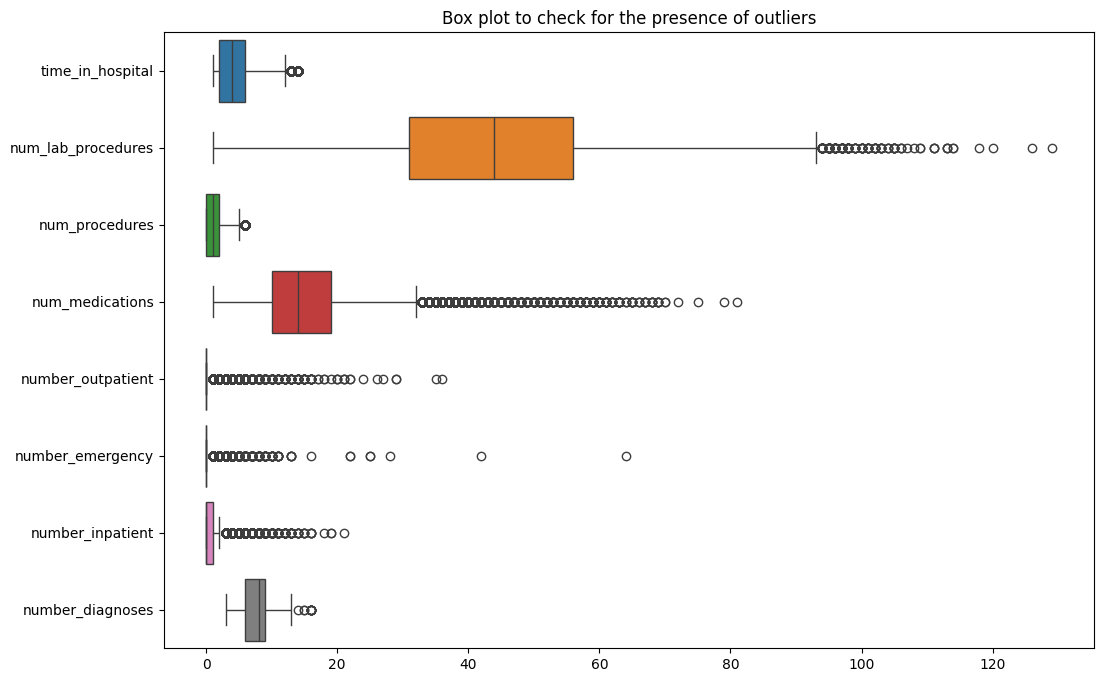

In [ ]:
# construct box plot for continuous variables to check the presence of outliers

plt.figure(figsize = (12, 8))
sns.boxplot(data = diabetes_df[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']], orient = 'h')
plt.title('Box plot to check for the presence of outliers')

In [ ]:
# Handling outliers

for col in diabetes_df[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']]:
  print(f"Column : {col}\n")
  # Calculate the upper and lower limits
  Q1 = diabetes_df[col].quantile(0.25)
  Q3 = diabetes_df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5*IQR
  upper_limit = Q3 + 1.5*IQR

  diabetes_df[col] = np.where(diabetes_df[col] < lower_limit, lower_limit, diabetes_df[col])
  diabetes_df[col] = np.where(diabetes_df[col] > upper_limit, upper_limit, diabetes_df[col])


Column : time_in_hospital

Column : num_lab_procedures

Column : num_procedures

Column : num_medications

Column : number_outpatient

Column : number_emergency

Column : number_inpatient

Column : number_diagnoses



Text(0.5, 1.0, 'Box plot to check for the presence of outliers')

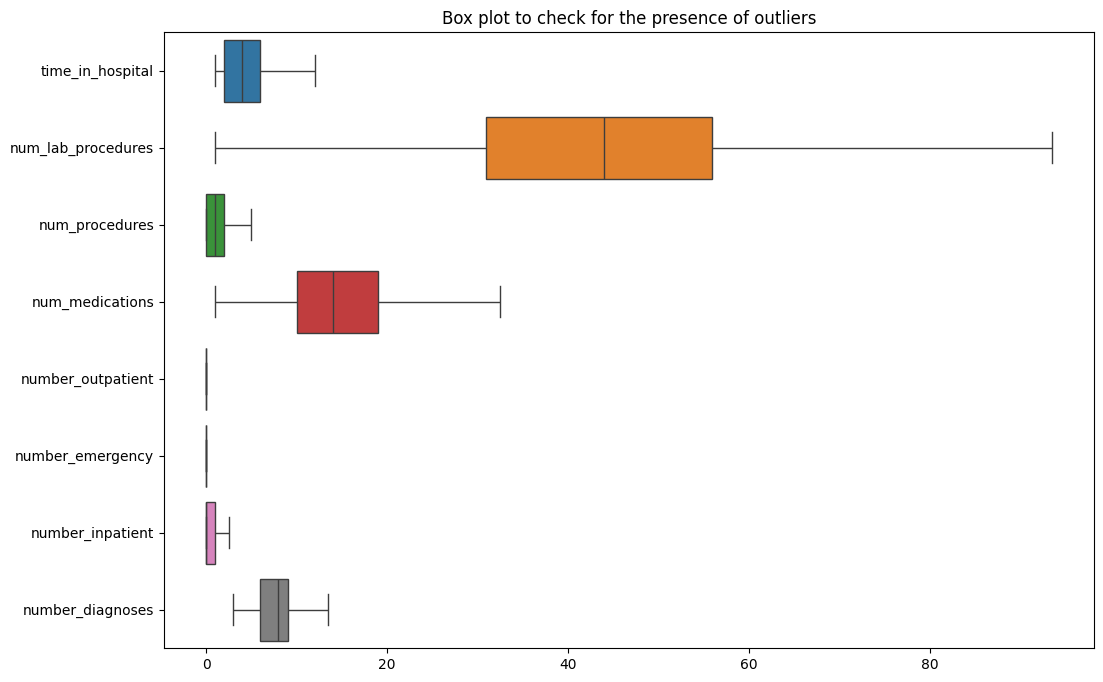

In [ ]:
# construct box plot for continuous variables to check the presence of outliers

plt.figure(figsize = (12, 8))
sns.boxplot(data = diabetes_df[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']], orient = 'h')
plt.title('Box plot to check for the presence of outliers')

Text(0.5, 1.0, 'Heat map diplaying the correlation between the variables in the dataframe')

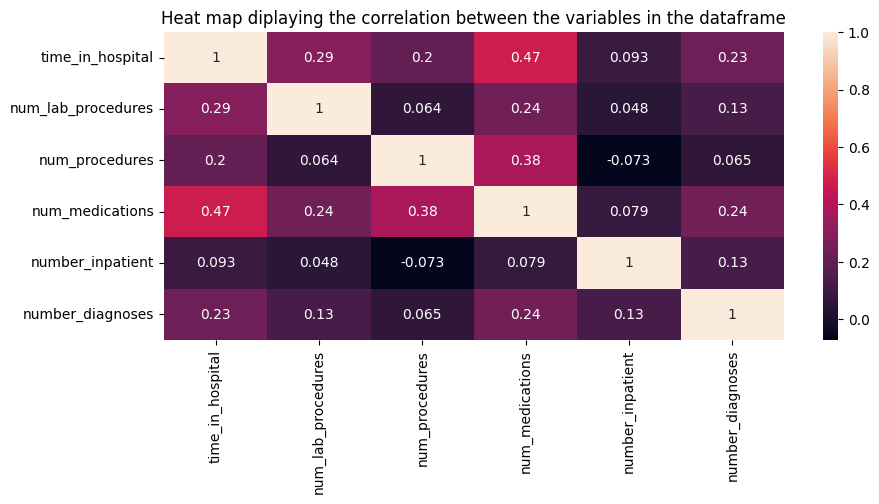

In [ ]:
plt.figure(figsize = (10, 4))
sns.heatmap(diabetes_df[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_inpatient', 'number_diagnoses']].corr(), annot = True)
plt.title('Heat map diplaying the correlation between the variables in the dataframe')

In [ ]:
# Converting the object types to categorical types

for feature in diabetes_df.columns:
  if diabetes_df[feature].dtype == 'object':
    print(f"Converting feature : {feature} to categorical")
    print(pd.Categorical(diabetes_df[feature].unique()))
    print(pd.Categorical(diabetes_df[feature].unique()).codes)
    diabetes_df[feature] = pd.Categorical(diabetes_df[feature]).codes
    print(f"\n\n")

Converting feature : race to categorical
['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic']
Categories (5, object): ['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other']
[2 0 4 1 3]



Converting feature : gender to categorical
['Female', 'Male']
Categories (2, object): ['Female', 'Male']
[0 1]



Converting feature : age to categorical
['[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)', '[0-10)']
Categories (10, object): ['[0-10)', '[10-20)', '[20-30)', '[30-40)', ..., '[60-70)', '[70-80)',
                          '[80-90)', '[90-100)']
[1 2 3 4 5 6 7 8 9 0]



Converting feature : diag_1 to categorical
['276', '648', '8', '197', '414', ..., '338', '58', '615', '832', '975']
Length: 680
Categories (680, object): ['11', '110', '112', '115', ..., 'V63', 'V66', 'V67', 'V71']
[137 439 533  51 252 265 241 271 115  23 337 663 248 457 243 673  44 519
 264 660 138 392 295 303 249  34 314 662 331 269 425 155  50 114  38 57

In [ ]:
diabetes_df.head(10)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,change,diabatic
1,2,0,1,1,1,7,3.0,59.0,0.0,18.0,0.0,0.0,0.0,137,68,111,9.0,0,1
2,0,0,2,1,1,7,2.0,11.0,5.0,13.0,0.0,0.0,1.0,439,67,699,6.0,1,1
3,2,1,3,1,1,7,2.0,44.0,1.0,16.0,0.0,0.0,0.0,533,86,233,7.0,0,1
4,2,1,4,1,1,7,1.0,51.0,0.0,8.0,0.0,0.0,0.0,51,18,76,5.0,0,1
5,2,1,5,2,1,2,3.0,31.0,5.0,16.0,0.0,0.0,0.0,252,229,76,9.0,1,1
6,2,1,6,3,1,2,4.0,70.0,1.0,21.0,0.0,0.0,0.0,252,229,703,7.0,0,1
7,2,1,7,1,1,7,5.0,73.0,0.0,12.0,0.0,0.0,0.0,265,296,76,8.0,1,1
8,2,0,8,2,1,4,12.0,68.0,2.0,28.0,0.0,0.0,0.0,241,243,215,8.0,0,1
9,2,0,9,3,3,4,12.0,33.0,3.0,18.0,0.0,0.0,0.0,271,37,298,8.0,0,1
10,0,0,4,1,1,7,9.0,47.0,2.0,17.0,0.0,0.0,0.0,115,224,617,9.0,1,1


In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67471 entries, 1 to 70179
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      67471 non-null  int8   
 1   gender                    67471 non-null  int8   
 2   age                       67471 non-null  int8   
 3   admission_type_id         67471 non-null  int64  
 4   discharge_disposition_id  67471 non-null  int64  
 5   admission_source_id       67471 non-null  int64  
 6   time_in_hospital          67471 non-null  float64
 7   num_lab_procedures        67471 non-null  float64
 8   num_procedures            67471 non-null  float64
 9   num_medications           67471 non-null  float64
 10  number_outpatient         67471 non-null  float64
 11  number_emergency          67471 non-null  float64
 12  number_inpatient          67471 non-null  float64
 13  diag_1                    67471 non-null  int16  
 14  diag_2     

In [ ]:
X = diabetes_df.drop('diabatic', axis = 1)
X

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,change
1,2,0,1,1,1,7,3.0,59.0,0.0,18.0,0.0,0.0,0.0,137,68,111,9.0,0
2,0,0,2,1,1,7,2.0,11.0,5.0,13.0,0.0,0.0,1.0,439,67,699,6.0,1
3,2,1,3,1,1,7,2.0,44.0,1.0,16.0,0.0,0.0,0.0,533,86,233,7.0,0
4,2,1,4,1,1,7,1.0,51.0,0.0,8.0,0.0,0.0,0.0,51,18,76,5.0,0
5,2,1,5,2,1,2,3.0,31.0,5.0,16.0,0.0,0.0,0.0,252,229,76,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70175,0,0,8,1,3,7,7.0,60.0,0.0,17.0,0.0,0.0,1.0,318,436,76,9.0,1
70176,0,0,7,1,1,7,3.0,57.0,4.0,11.0,0.0,0.0,1.0,519,232,249,9.0,1
70177,0,1,9,1,3,7,4.0,21.0,1.0,8.0,0.0,0.0,1.0,550,243,128,9.0,1
70178,2,0,8,1,1,7,1.0,49.0,0.0,12.0,0.0,0.0,0.0,264,244,253,9.0,1


In [ ]:
y = diabetes_df['diabatic']
y

,diabatic
1,1
2,1
3,1
4,1
5,1
...,...
70175,0
70176,0
70177,0
70178,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
print('X_train.shape: ', X_train.shape)
X_train

X_train.shape:  (47229, 18)


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,change
44208,2,1,6,1,1,7,2.0,36.0,0.0,16.0,0.0,0.0,0.0,513,67,231,9.0,1
38366,2,1,6,3,1,1,4.0,42.0,1.0,8.0,0.0,0.0,0.0,287,222,76,7.0,1
26187,0,0,9,6,3,7,5.0,75.0,0.0,6.0,0.0,0.0,1.0,367,121,76,6.0,1
23422,2,1,7,2,1,1,2.0,31.0,0.0,9.0,0.0,0.0,0.0,252,300,231,8.0,0
3815,2,0,5,5,1,17,6.0,25.0,0.0,17.0,0.0,0.0,0.0,226,360,128,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51444,2,0,6,5,1,1,1.0,41.0,0.0,12.0,0.0,0.0,0.0,519,69,147,8.0,1
21543,0,0,5,1,1,7,5.0,52.0,0.0,8.0,0.0,0.0,0.0,271,140,357,6.0,1
22401,2,0,7,1,3,7,7.0,69.0,3.0,26.0,0.0,0.0,0.0,226,485,258,9.0,1
52420,2,1,7,1,1,7,1.0,11.0,0.0,9.0,0.0,0.0,0.0,252,241,506,9.0,1


In [ ]:
print('y_train.shape: ', y_train.shape)
y_train

y_train.shape:  (47229,)


,diabatic
44208,0
38366,1
26187,0
23422,1
3815,0
...,...
51444,1
21543,0
22401,0
52420,0


In [ ]:
print('X_test.shape: ', X_test.shape)
X_test

X_test.shape:  (20242, 18)


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,change
7312,2,1,7,3,5,6,3.0,1.0,0.0,8.0,0.0,0.0,1.0,264,300,452,7.0,1
43555,2,0,6,3,1,1,2.0,31.0,0.0,13.0,0.0,0.0,0.0,320,431,252,9.0,1
57690,2,0,7,3,5,1,3.0,1.0,0.0,14.0,0.0,0.0,1.0,156,244,76,7.0,1
53415,2,0,6,3,1,1,6.0,14.0,0.0,15.0,0.0,0.0,0.0,155,121,307,9.0,1
45027,2,0,6,3,1,1,1.0,15.0,4.0,16.0,0.0,0.0,0.0,265,243,249,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,2,1,5,1,1,7,2.0,46.0,0.0,6.0,0.0,0.0,0.0,519,148,76,5.0,1
7653,2,1,7,5,2,17,1.0,27.0,0.0,8.0,0.0,0.0,0.0,252,229,124,8.0,1
224,2,1,5,6,25,1,1.0,54.0,5.0,4.0,0.0,0.0,0.0,252,91,95,6.0,1
42651,2,0,7,2,1,7,2.0,9.0,0.0,5.0,0.0,0.0,0.0,519,91,199,5.0,0


In [ ]:
print('y_test.shape: ', y_test.shape)
y_test

y_test.shape:  (20242,)


,diabatic
7312,1
43555,0
57690,1
53415,1
45027,1
...,...
6231,0
7653,1
224,1
42651,1


**DecisionTree classifier**

In [ ]:
dtcl = DecisionTreeClassifier(random_state=1)
dtcl.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
# dtcl model's prediction on training data

y_train_predict = dtcl.predict(X_train)
y_train_predict

array([0, 1, 0, ..., 0, 0, 1], dtype=int8)

In [ ]:
# dtcl model's prediction on taining data

conf_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = [['0', '1']], index = [['0', '1']])
conf_train

,0,1
0,15936,0
1,0,31293


In [ ]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15936
           1       1.00      1.00      1.00     31293

    accuracy                           1.00     47229
   macro avg       1.00      1.00      1.00     47229
weighted avg       1.00      1.00      1.00     47229



In [ ]:
# dtcl model's prediction probability on training data

y_train_predict_prob = dtcl.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
auc_score_train = roc_auc_score(y_train, y_train_predict_prob_pos)
print('auc_score of dtcl model on training data: ', auc_score_train)

auc_score of dtcl model on training data:  1.0


Text(0.5, 1.0, 'ROC curve of dtcl model on training data.')

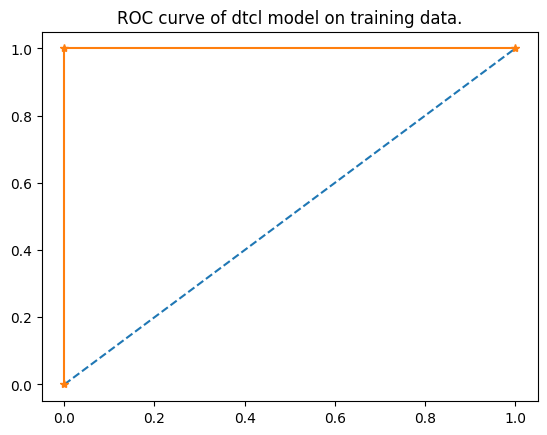

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.title('ROC curve of dtcl model on training data.')

In [ ]:
# dtcl model's prediction on test data

y_test_predict = dtcl.predict(X_test)
y_test_predict

array([0, 0, 1, ..., 0, 1, 0], dtype=int8)

In [ ]:
# dtcl model's prediction on test data

conf_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = [['0', '1']], index = [['0', '1']])
conf_test

,0,1
0,3836,2930
1,2991,10485


In [ ]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.56      0.57      0.56      6766
           1       0.78      0.78      0.78     13476

    accuracy                           0.71     20242
   macro avg       0.67      0.67      0.67     20242
weighted avg       0.71      0.71      0.71     20242



In [ ]:
# dtcl model's prediction probability on test data

y_test_predict_prob = dtcl.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
auc_score_test = roc_auc_score(y_test, y_test_predict_prob_pos)
print('auc_score of dtcl model on test data: ', auc_score_test)

auc_score of dtcl model on test data:  0.6725011377667763


Text(0.5, 1.0, 'ROC curve of dtcl model on test data.')

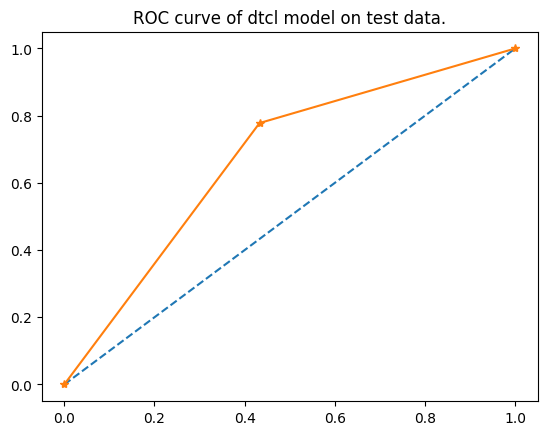

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.title('ROC curve of dtcl model on test data.')

In [ ]:
print(pd.DataFrame(dtcl.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp', ascending = False))

                               Imp
change                    0.306632
num_lab_procedures        0.101471
diag_1                    0.088623
diag_3                    0.087264
diag_2                    0.084997
num_medications           0.064762
time_in_hospital          0.051560
age                       0.038759
discharge_disposition_id  0.030326
num_procedures            0.028495
number_diagnoses          0.023555
number_inpatient          0.022582
admission_source_id       0.021030
admission_type_id         0.019665
race                      0.016267
gender                    0.014010
number_outpatient         0.000000
number_emergency          0.000000


In [ ]:
# Decision tree visualization

from google.colab import drive

drive.mount('/content/drive')
file = open('/content/drive/My Drive/Colab Notebooks/diabatic_decision_tree.dot', 'w')
train_char_label = ['1', '0']
dot_data = export_graphviz(dtcl, out_file = file, feature_names = list(X_train), class_names = list(train_char_label))
file.close()

Mounted at /content/drive


**Training Set Performance:**
1. The DecisionTree classifier model achieves an accuracy of 1.00 on the training set.
2. Metrics for exceptional both Class 0 (precision=1.00, recall=1.00, F1-score=1.00) and Class 1 (precision=1.00, recall=1.00, F1-score=1.00).
3. The ROC AUC score is 1.00, demonstrating exceptional predictive power.

**Test Set Performance:**
1. On the test set, the accuracy drops to 0.71 .
2. Class 0 metrics are poor (precision=0.56, recall=0.57, F1-score=0.56), while class 1 metrics are moderate (precision=0.78, recall=0.78, F1-score=0.78).
3. The ROC AUC score is 0.67, demonstrating weak predictive power.

**Analysis:** The DecisionTree classifier exhibits overfitting and requires extensive tuning to generalize well.

**Regularized dtcl classifier**

In [ ]:
# Regularized dtcl classifier

param_grid = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150],
    'min_samples_split': [150,300,450],
}


grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=150, random_state=1)

In [ ]:
# Regularized dtcl model's prediction on training data

y_train_predict = best_grid.predict(X_train)
y_train_predict

array([0, 0, 0, ..., 0, 0, 1], dtype=int8)

In [ ]:
# Regularized dtcl model's performance on taining data

conf_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = [['0', '1']], index = [['0', '1']])
conf_train

,0,1
0,11660,4276
1,7126,24167


In [ ]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.62      0.73      0.67     15936
           1       0.85      0.77      0.81     31293

    accuracy                           0.76     47229
   macro avg       0.74      0.75      0.74     47229
weighted avg       0.77      0.76      0.76     47229



In [ ]:
# Regularized dtcl model's prediction probability on training data

y_train_predict_prob = best_grid.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
auc_score_train = roc_auc_score(y_train, y_train_predict_prob_pos)
print('auc_score of regularized dtcl model on training data: ', auc_score_train)

auc_score of regularized dtcl model on training data:  0.8512419641496994


Text(0.5, 1.0, 'ROC curve of regularized dtcl model on training data.')

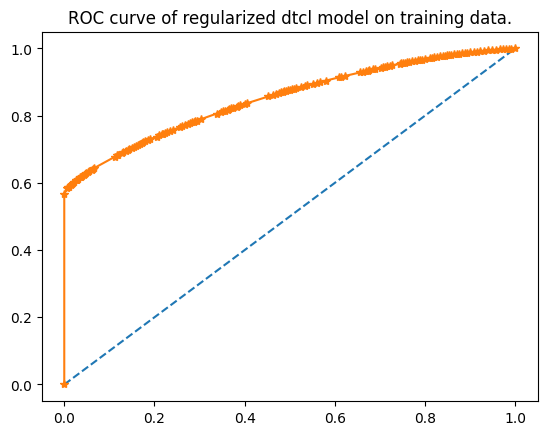

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.title('ROC curve of regularized dtcl model on training data.')

In [ ]:
# Regularized dtcl model's prediction on test data

y_test_predict = best_grid.predict(X_test)
y_test_predict

array([0, 0, 1, ..., 0, 1, 0], dtype=int8)

In [ ]:
# Regularized dtcl model's performance on test data

conf_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = [['0', '1']], index = [['0', '1']])
conf_test

,0,1
0,4846,1920
1,3353,10123


In [ ]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.59      0.72      0.65      6766
           1       0.84      0.75      0.79     13476

    accuracy                           0.74     20242
   macro avg       0.72      0.73      0.72     20242
weighted avg       0.76      0.74      0.74     20242



In [ ]:
# Regularized dtcl model's prediction probability on test data

y_test_predict_prob = best_grid.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
auc_score_test = roc_auc_score(y_test, y_test_predict_prob_pos)
print('auc_score of regularized dtcl model on test data: ', auc_score_test)

auc_score of regularized dtcl model on test data:  0.8275033643853511


Text(0.5, 1.0, 'ROC curve of regularized dtcl model on test data.')

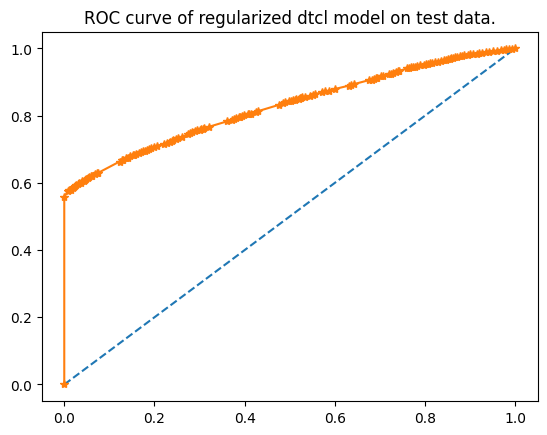

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.title('ROC curve of regularized dtcl model on test data.')

In [ ]:
# Regularized Decision tree visualization


file = open('/content/drive/My Drive/Colab Notebooks/diabatic_regularized_decision_tree.dot', 'w')
train_char_label = ['1', '0']
dot_data = export_graphviz(best_grid, out_file = file, feature_names = list(X_train), class_names = list(train_char_label))
file.close()


**Training Set Performance:**
1. The regularized DecisionTree classifier model achieves an accuracy of 0.76 on the training set.
2. Class 0 metrics are weak (precision=0.62, recall=0.73, F1-score=0.67), while Class 1 metrics are robust (precision=0.85, recall=0.77, F1-score=0.81),
3. The ROC AUC score is 0.85, demonstrating strong predictive power.

**Test Set Performance:**
1. On the test set, the accuracy remains steady at 0.74 .
2. Class 0 metrics are weak (precision=0.59, recall=0.72, F1-score=0.65), while class 1 metrics are moderate (precision=0.84, recall=0.75, F1-score=0.79).
3. The ROC AUC score is 0.83, demonstrating strong predictive power.

**Analysis:** The regularized DecisionTree classifier maintains consistent performance across training and test sets, suggesting good generalization capabilities.

**Random Forest**

In [ ]:
rfcl = RandomForestClassifier(random_state = 1)

rfcl.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
# rfcl model classification on train set

y_train_predict = rfcl.predict(X_train)
y_train_predict

array([0, 1, 0, ..., 0, 0, 1], dtype=int8)

In [ ]:
# rfcl model performance on train set

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = [0, 1], index = [0, 1])
cm_train

,0,1
0,15936,0
1,0,31293


In [ ]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15936
           1       1.00      1.00      1.00     31293

    accuracy                           1.00     47229
   macro avg       1.00      1.00      1.00     47229
weighted avg       1.00      1.00      1.00     47229



In [ ]:
y_train_predict_prob = rfcl.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of rfcl on train data: {}'.format(roc_score))

roc_auc_score of rfcl on train data: 1.0


Text(0.5, 1.0, 'ROC curve of rfcl on training data.')

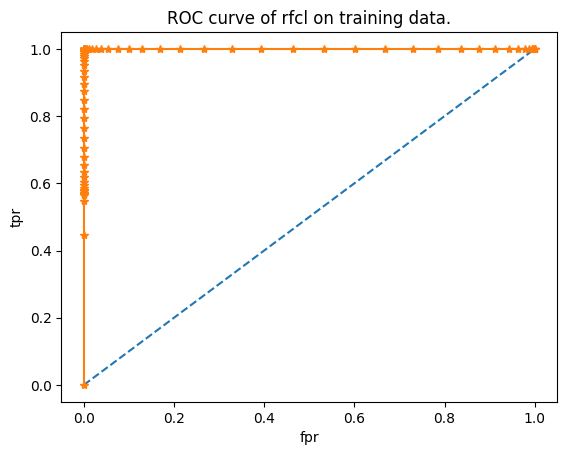

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of rfcl on training data.')

In [ ]:
# rfcl model classification on test set

y_test_predict = rfcl.predict(X_test)
y_test_predict

array([0, 0, 1, ..., 1, 1, 0], dtype=int8)

In [ ]:
# rfcl model performance on test set

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = [0, 1], index = [0, 1])
cm_test

,0,1
0,4756,2010
1,3052,10424


In [ ]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.61      0.70      0.65      6766
           1       0.84      0.77      0.80     13476

    accuracy                           0.75     20242
   macro avg       0.72      0.74      0.73     20242
weighted avg       0.76      0.75      0.75     20242



In [ ]:
y_test_predict_prob = rfcl.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score_test = roc_auc_score(y_test, y_test_predict_prob_pos)

print(f"roc_auc_score of rfcl on test data: {roc_score_test}")

roc_auc_score of rfcl on test data: 0.8397868805115445


Text(0.5, 1.0, 'ROC curve of rfcl on test data.')

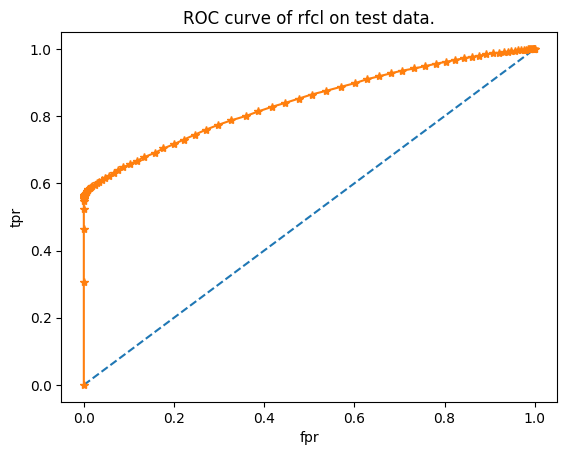

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC curve of rfcl on test data.")

**Training Set Performance:**
1. The RandomForest classifier model achieves an accuracy of 1.00 on the training set.
2. Metrics for exceptional both Class 0 (precision=1.00, recall=1.00, F1-score=1.00) and Class 1 (precision=1.00, recall=1.00, F1-score=1.00).
3. The ROC AUC score is 1.00, demonstrating exceptional predictive power.

**Test Set Performance:**
1. On the test set, the accuracy drops to 0.75 .
2. Class 0 metrics are weak (precision=0.61, recall=0.70, F1-score=0.65), while class 1 metrics are strong (precision=0.84, recall=0.77, F1-score=0.80).
3. The ROC AUC score is 0.84, demonstrating strong predictive power.

**Analysis:** The RandomForest classifier exhibits overfitting and shows a drop in performance on the test set, particularly for class 0, indicating potential overfitting and challenges in handling imbalanced data and requires extensive tuning to generalize well.

**Regularized rfcl classifier**


In [ ]:
# Regularized rfcl classifier

reg_rfcl = RandomForestClassifier(n_estimators = 50, criterion = 'gini', max_depth = 10, min_samples_leaf = 100, min_samples_split = 150, max_features = 'sqrt', oob_score = False, random_state = 1)
reg_rfcl.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=150, n_estimators=50, random_state=1)

In [ ]:
# reg_rfcl prediction on train data

y_train_predict = reg_rfcl.predict(X_train)
y_train_predict

array([0, 0, 0, ..., 0, 0, 1], dtype=int8)

In [ ]:
# reg_rfcl performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

,0,1
0,10845,5091
1,5965,25328


In [ ]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.65      0.68      0.66     15936
           1       0.83      0.81      0.82     31293

    accuracy                           0.77     47229
   macro avg       0.74      0.74      0.74     47229
weighted avg       0.77      0.77      0.77     47229



In [ ]:
y_train_predict_prob = reg_rfcl.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of reg_rfcl on train data: {}'.format(roc_score))

roc_auc_score of reg_rfcl on train data: 0.8578417272531793


Text(0.5, 1.0, 'ROC curve of reg_rfcl on training data.')

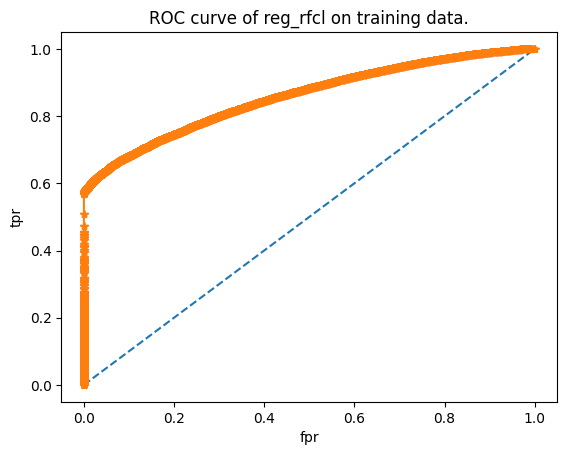

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC curve of reg_rfcl on training data.")

In [ ]:
# reg_rfcl prediction on test data

y_test_predict = reg_rfcl.predict(X_test)

In [ ]:
# reg_rfcl_model performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

,0,1
0,4406,2360
1,2809,10667


In [ ]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.61      0.65      0.63      6766
           1       0.82      0.79      0.80     13476

    accuracy                           0.74     20242
   macro avg       0.71      0.72      0.72     20242
weighted avg       0.75      0.74      0.75     20242



In [ ]:
y_test_predict_prob = reg_rfcl.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of reg_rfcl on test data: {}'.format(roc_score))

roc_auc_score of reg_rfcl on test data: 0.838189428100115


Text(0.5, 1.0, 'ROC curve of reg_rfcl on test data.')

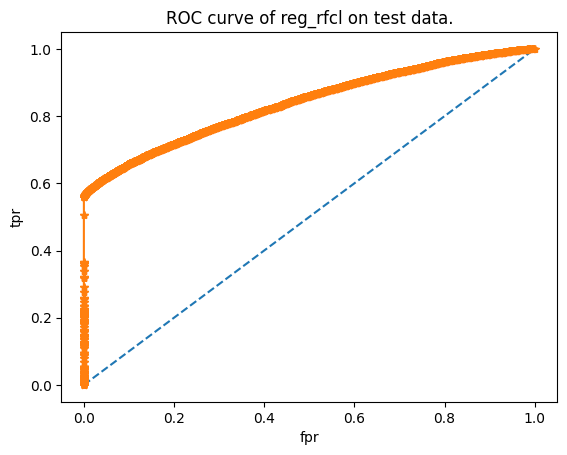

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC curve of reg_rfcl on test data.")

**Training Set Performance:**
1. The regularized RandomForest classifier model achieves an accuracy of 0.77 on the training set.
2. Class 0 metrics are weak (precision=0.65, recall=0.68, F1-score=0.66), while Class 1 metrics are robust (precision=0.83, recall=0.81, F1-score=0.82),
3. The ROC AUC score is 0.86, demonstrating strong predictive power.

**Test Set Performance:**
1. On the test set, the accuracy remains steady at 0.74 .
2. Class 0 metrics are weak (precision=0.61, recall=0.65, F1-score=0.63), while class 1 metrics are robust (precision=0.82, recall=0.79, F1-score=0.80).
3. The ROC AUC score is 0.84, demonstrating strong predictive power.

**Analysis:** The regularized RandomForest classifier maintains consistent performance across training and test sets, suggesting good generalization capabilities. Performance of Class 0 is weak in both train and test set indicating challenges in handling imbalanced data.

**Model with best performance -**

---



* Based on the provided text, the regularized RandomForest classifier appears to be the better-optimized model.
* It maintains consistent performance across both training and test datasets, suggesting good generalization capabilities.
* While the original RandomForest classifier and DecisionTree classifier models achieved perfect accuracy on the training set (indicating overfitting), their performance dropped on the test set.
* The regularized models, both Decision Tree and Random Forest, show more balanced performance, with the regularized Random Forest achieving a higher ROC AUC score (0.84) on the test data compared to the regularized Decision Tree (0.83).